In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_classification_functions
import custom_models
from custom_classification_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
import dgl_functions
from dgl_functions import *
import dgl_models
from dgl_models import *

In [4]:
from custom_models_fingerprints import *

In [5]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = False

In [6]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "DGL"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_dgl_classification/model_gnn_conv"
    else:
        filename_basic = "results_dgl_classification/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_dgl_classification_scaffold/model_gnn_conv"
    else:
        filename_basic = "results_dgl_classification_scaffold/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [7]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [8]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [9]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [10]:
batch_size = 1024

In [11]:
print(len(combinations))

108


In [12]:
param_combinations = dict()

hidden_feats = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256]]

predictor_hidden_feats = [128, 256, 512]
keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [13]:
param_combinations = dict()


param_combinations["hidden_feats"] = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]
param_combinations["predictor_hidden_feats"] = [128, 256, 512, 1024]
apply_scaffold_split_list = [apply_scaffold_split]
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

run: 0
{'hidden_feats': [64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}


[<torch.utils.data.dataset.Subset object at 0x000001ED7D28D220>, <torch.utils.data.dataset.Subset object at 0x000001ED1FE815B0>, <torch.utils.data.dataset.Subset object at 0x000001ED1FE81AF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=128, bias=True)


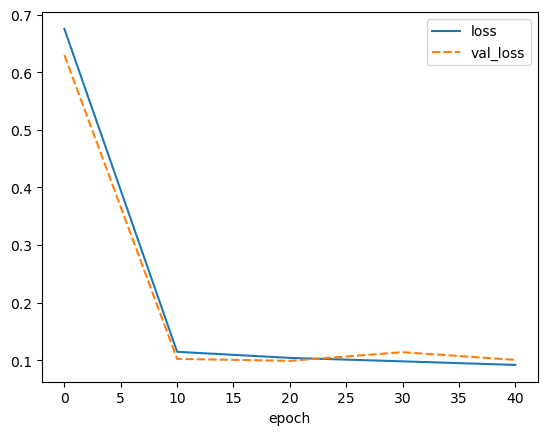

best weights loaded


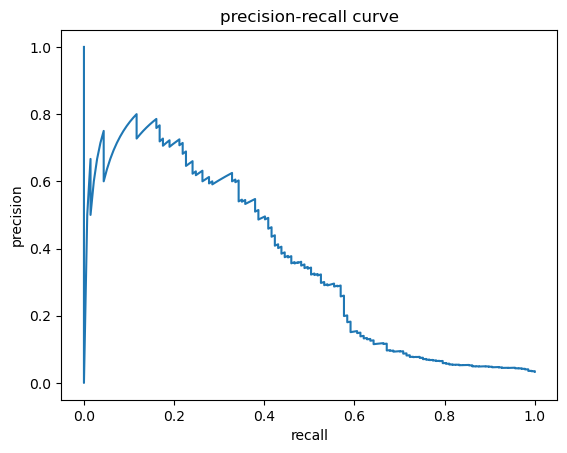

elapsed time: 281.40499234199524
run: 1
{'hidden_feats': [64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0822E8B0>, <torch.utils.data.dataset.Subset object at 0x000001EE5B2715E0>, <torch.utils.data.dataset.Subset object at 0x000001EE5B2719A0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
  

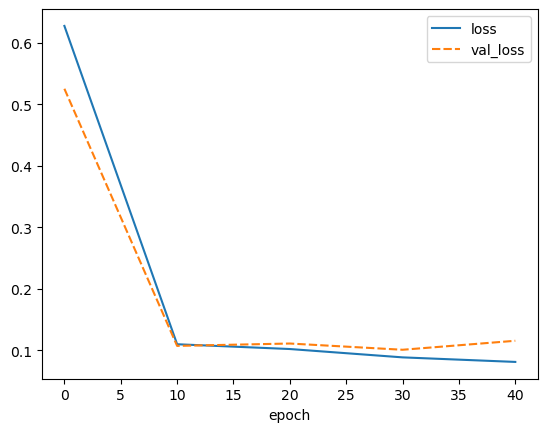

best weights loaded


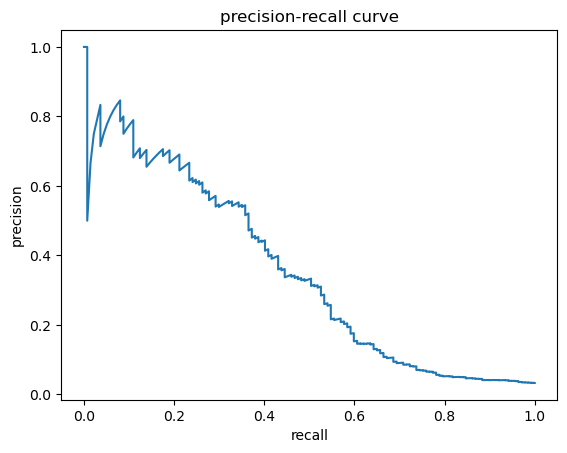

elapsed time: 331.66511249542236
run: 2
{'hidden_feats': [64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED12029220>, <torch.utils.data.dataset.Subset object at 0x000001EE5B260430>, <torch.utils.data.dataset.Subset object at 0x000001EE5B237460>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
  

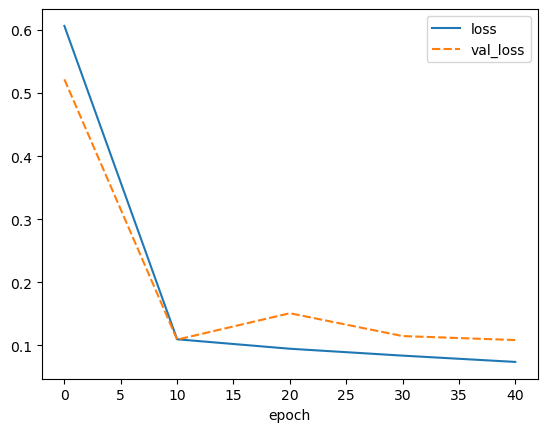

best weights loaded


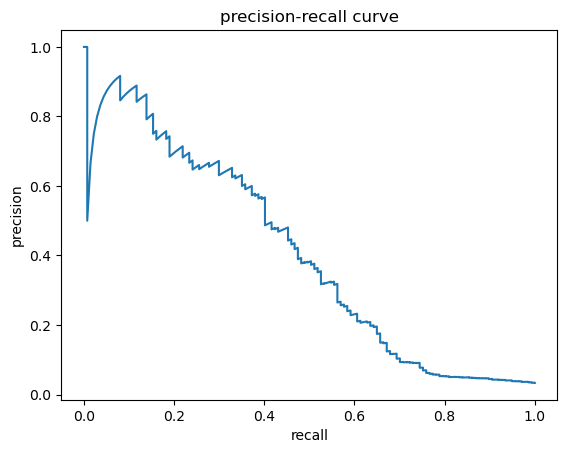

elapsed time: 338.8242437839508
run: 3
{'hidden_feats': [64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1937BBB0>, <torch.utils.data.dataset.Subset object at 0x000001EE5B2D7040>, <torch.utils.data.dataset.Subset object at 0x000001EE5B2D7370>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
  

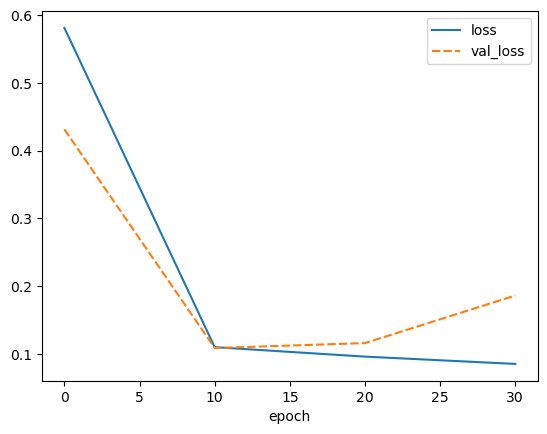

best weights loaded


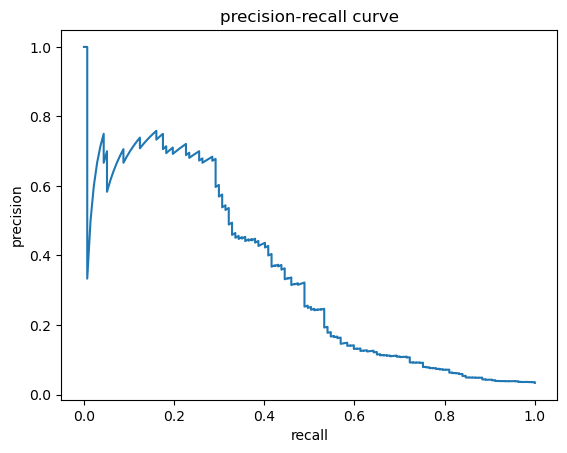

elapsed time: 276.7361032962799
run: 4
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1E6DEBE0>, <torch.utils.data.dataset.Subset object at 0x000001EE40496640>, <torch.utils.data.dataset.Subset object at 0x000001EE40496B80>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_feat

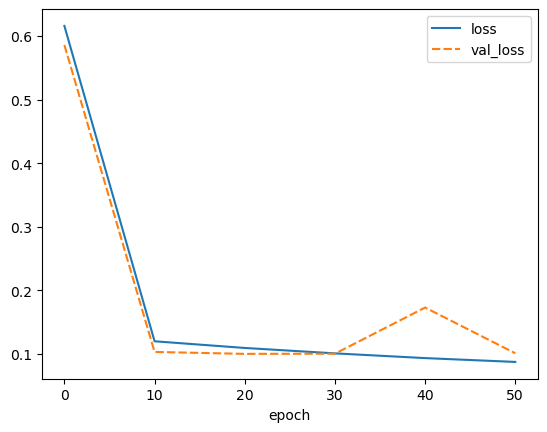

best weights loaded


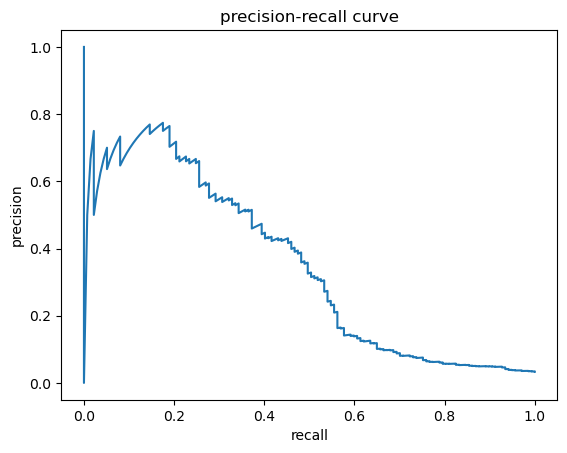

elapsed time: 369.211727142334
run: 5
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED10797430>, <torch.utils.data.dataset.Subset object at 0x000001EE404C3C70>, <torch.utils.data.dataset.Subset object at 0x000001EE404C91C0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_featu

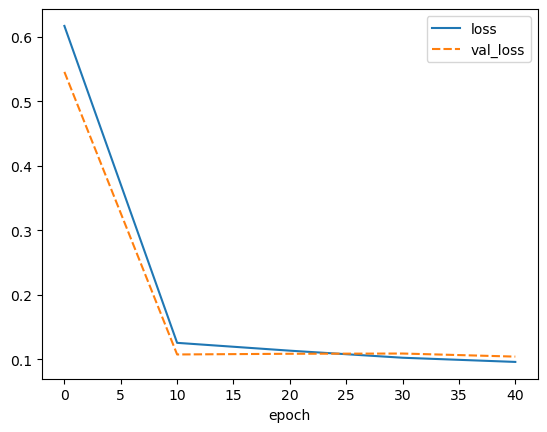

best weights loaded


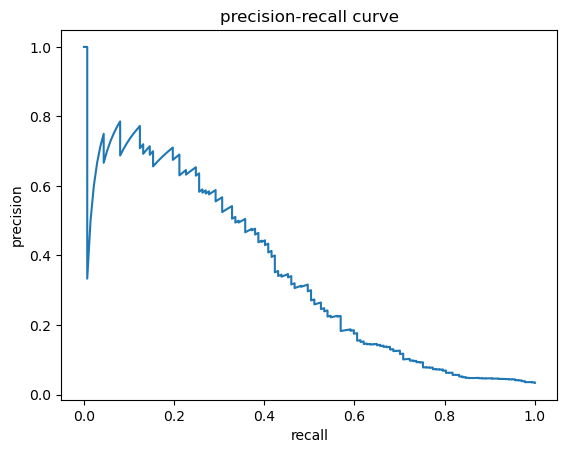

elapsed time: 397.41630458831787
run: 6
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED13CA4820>, <torch.utils.data.dataset.Subset object at 0x000001ED107E3DF0>, <torch.utils.data.dataset.Subset object at 0x000001ED107E3490>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_fea

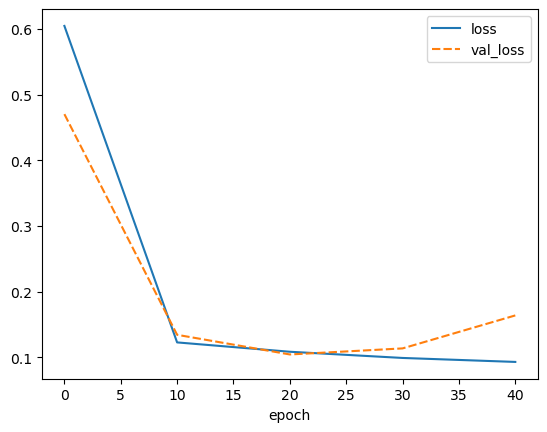

best weights loaded


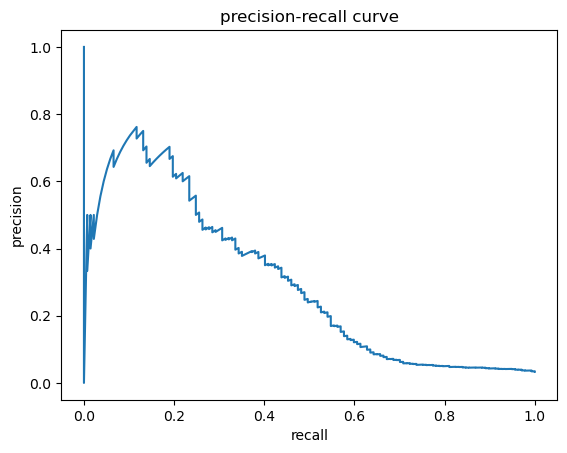

elapsed time: 348.5402057170868
run: 7
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0A1542E0>, <torch.utils.data.dataset.Subset object at 0x000001EE404C9640>, <torch.utils.data.dataset.Subset object at 0x000001EE404C97C0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_fea

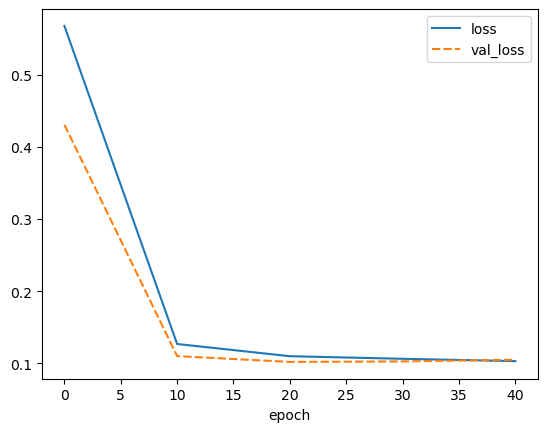

best weights loaded


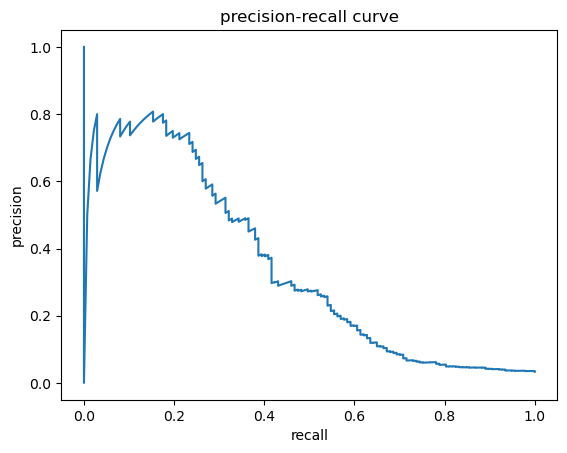

elapsed time: 361.5151135921478
run: 8
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0CF159A0>, <torch.utils.data.dataset.Subset object at 0x000001ED1408CA90>, <torch.utils.data.dataset.Subset object at 0x000001ED1408CE80>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64

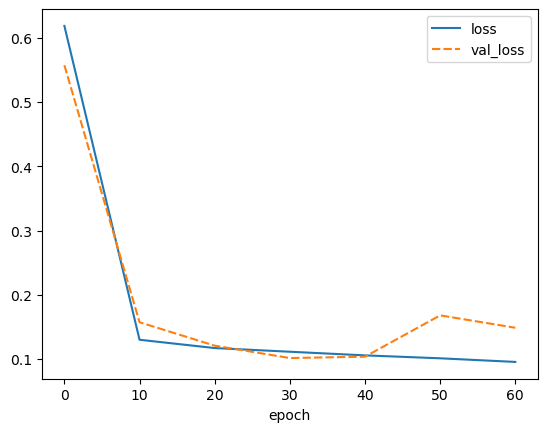

best weights loaded


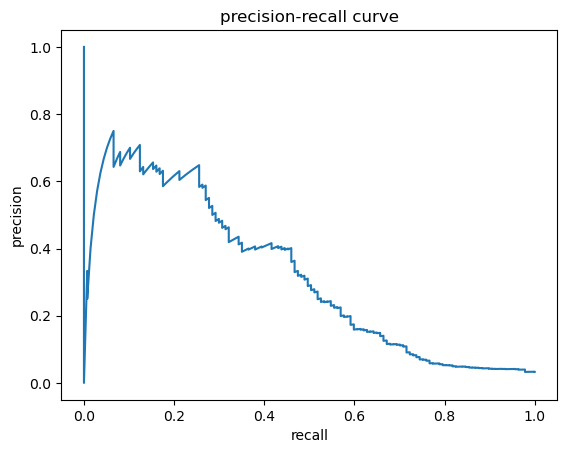

elapsed time: 429.2425768375397
run: 9
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED045E0E50>, <torch.utils.data.dataset.Subset object at 0x000001EE404C9CD0>, <torch.utils.data.dataset.Subset object at 0x000001EE5B1899A0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64

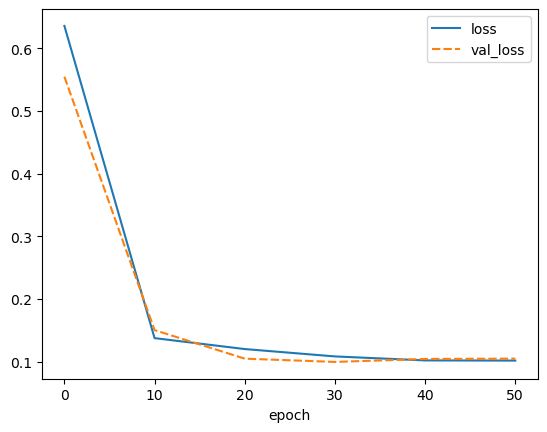

best weights loaded


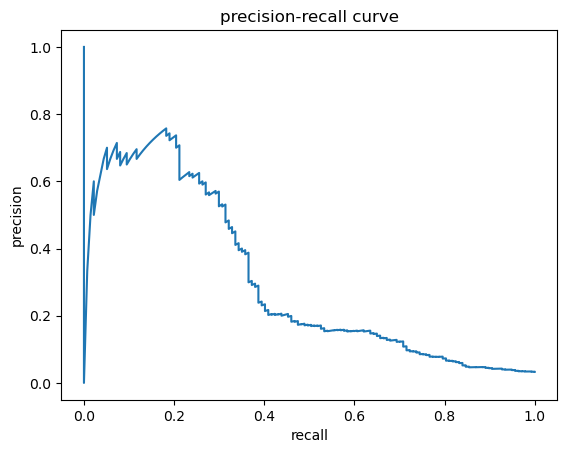

elapsed time: 362.89166951179504
run: 10
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED066598E0>, <torch.utils.data.dataset.Subset object at 0x000001EE40CEB0D0>, <torch.utils.data.dataset.Subset object at 0x000001EE40CEBD60>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=

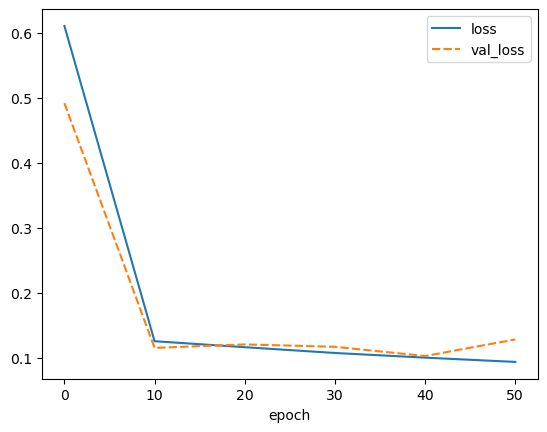

best weights loaded


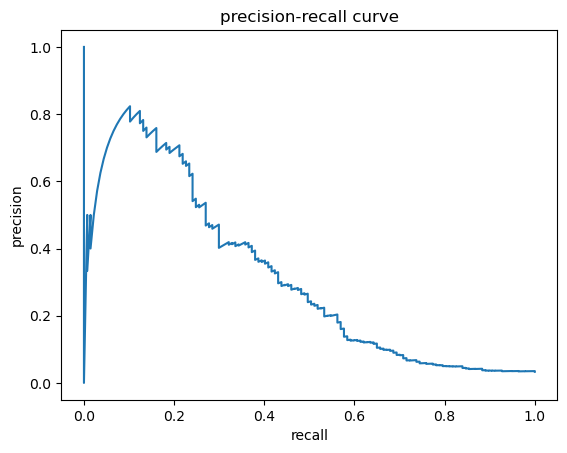

elapsed time: 389.3234152793884
run: 11
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED7D6029A0>, <torch.utils.data.dataset.Subset object at 0x000001ED142F9310>, <torch.utils.data.dataset.Subset object at 0x000001ED142F9820>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=

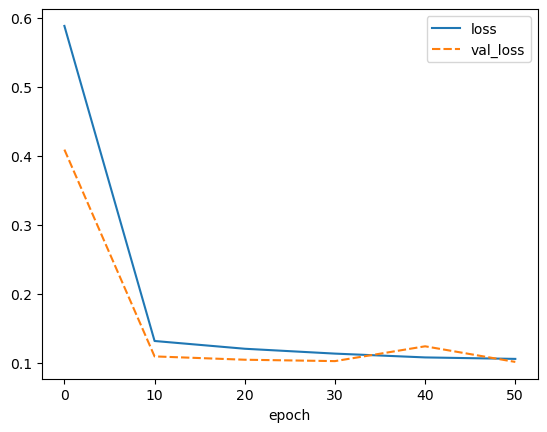

best weights loaded


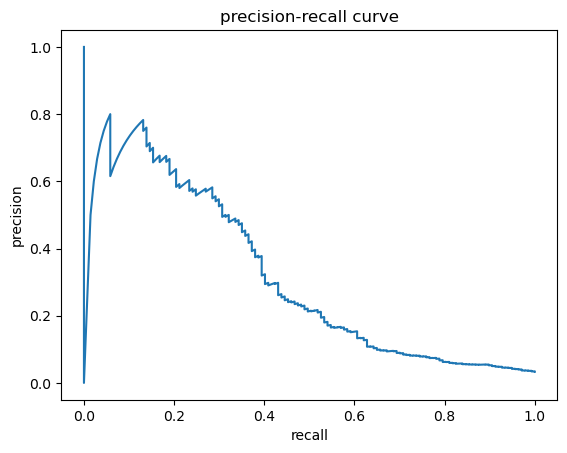

elapsed time: 369.75298714637756
run: 12
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED7F902C70>, <torch.utils.data.dataset.Subset object at 0x000001ED1247EB50>, <torch.utils.data.dataset.Subset object at 0x000001EE59DF1400>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_featu

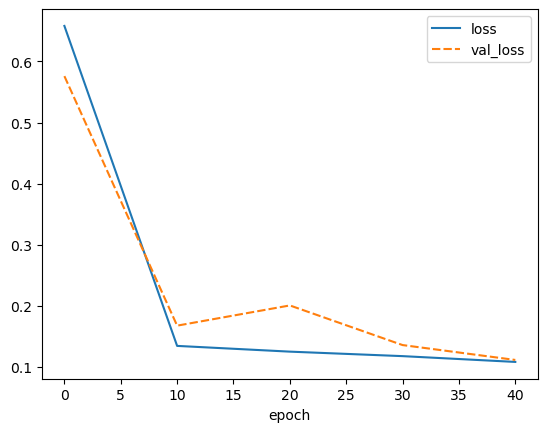

best weights loaded


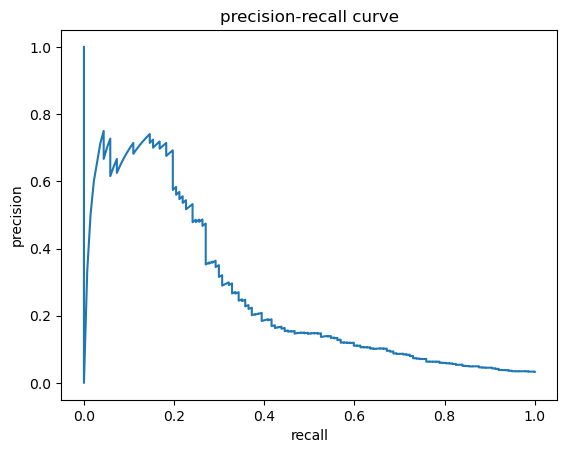

elapsed time: 343.7312116622925
run: 13
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1EC3A640>, <torch.utils.data.dataset.Subset object at 0x000001EE40D18040>, <torch.utils.data.dataset.Subset object at 0x000001EE40D18430>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_featur

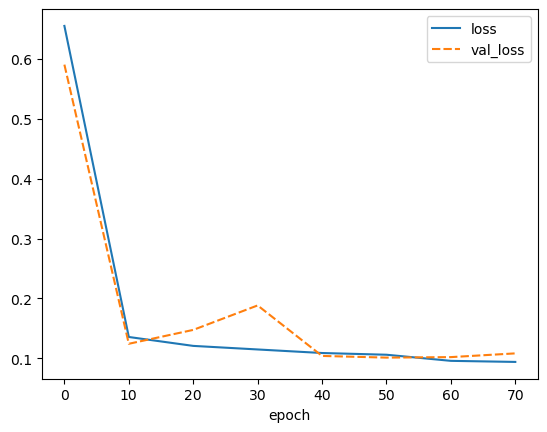

best weights loaded


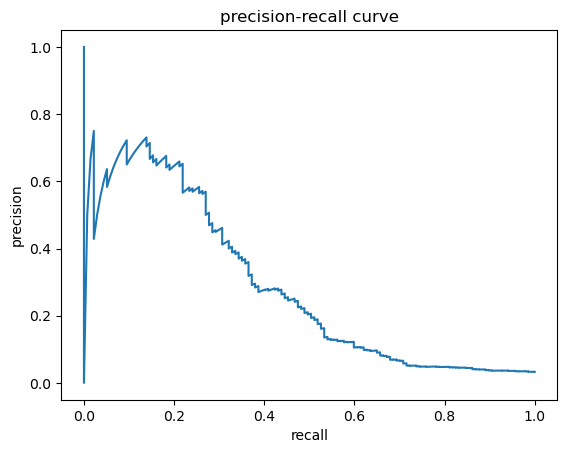

elapsed time: 495.2979040145874
run: 14
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED120A49D0>, <torch.utils.data.dataset.Subset object at 0x000001EE3B23EA90>, <torch.utils.data.dataset.Subset object at 0x000001EE3B225B80>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_featur

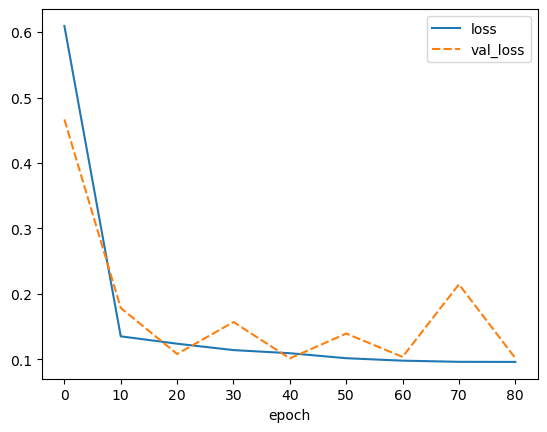

best weights loaded


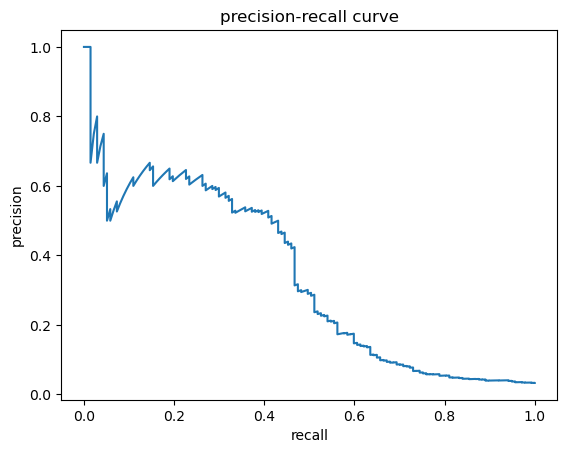

elapsed time: 480.91578006744385
run: 15
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0E924250>, <torch.utils.data.dataset.Subset object at 0x000001EE3B23EB80>, <torch.utils.data.dataset.Subset object at 0x000001EE59DF1C10>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_feat

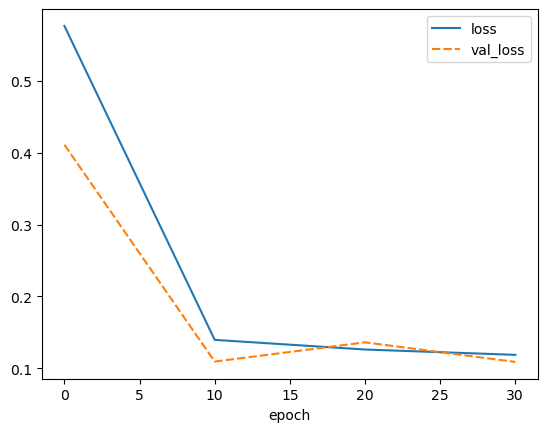

best weights loaded


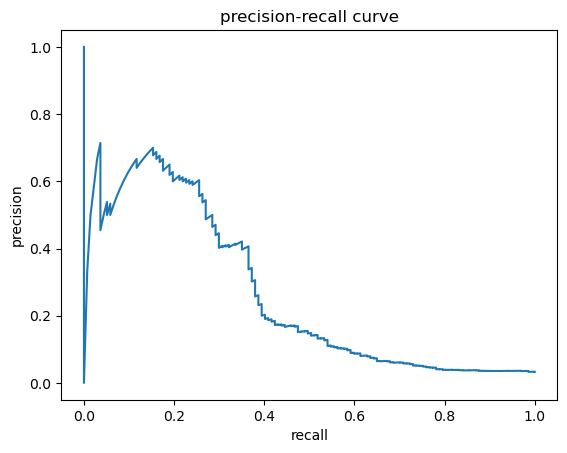

elapsed time: 356.5617182254791
run: 16
{'hidden_feats': [128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1B47EC10>, <torch.utils.data.dataset.Subset object at 0x000001EE40D3F460>, <torch.utils.data.dataset.Subset object at 0x000001EE40D3F970>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredicto

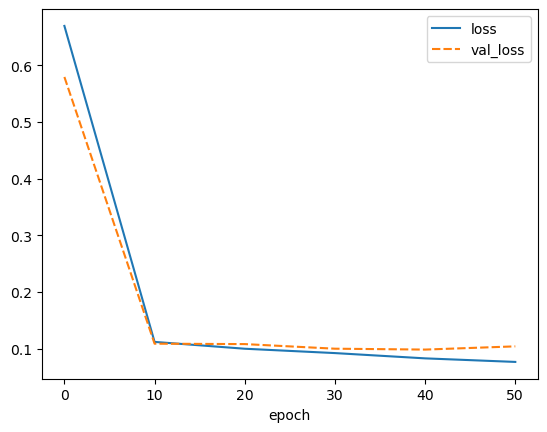

best weights loaded


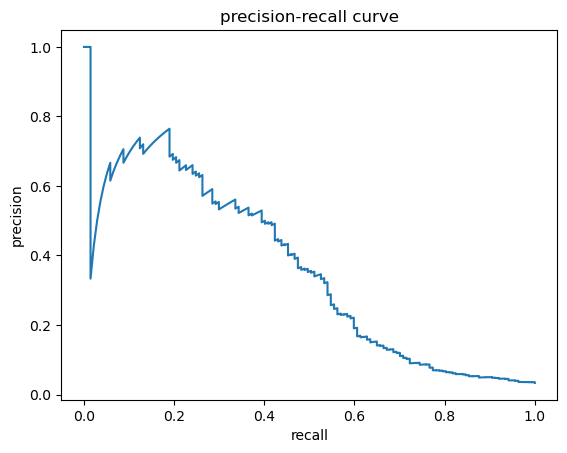

elapsed time: 346.12170791625977
run: 17
{'hidden_feats': [128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED09BA4220>, <torch.utils.data.dataset.Subset object at 0x000001EE32D151F0>, <torch.utils.data.dataset.Subset object at 0x000001EE32D155B0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

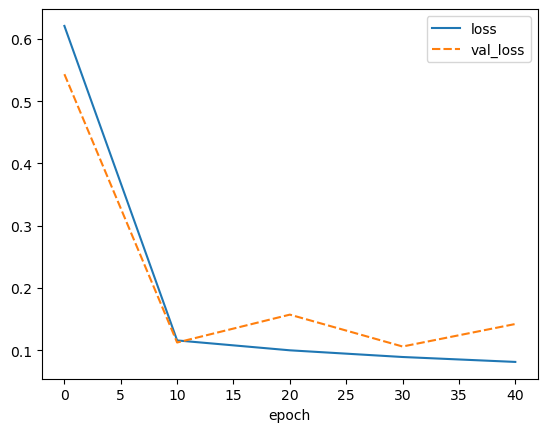

best weights loaded


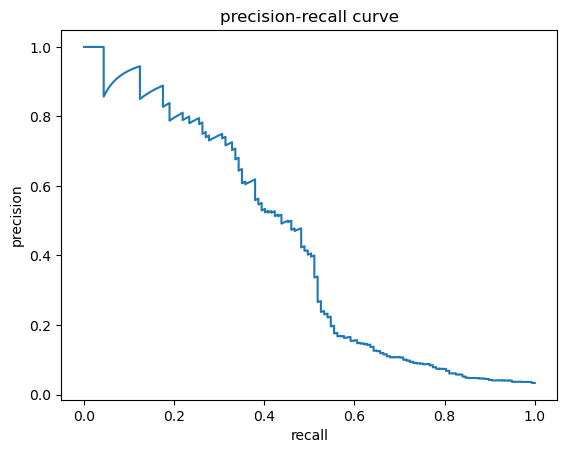

elapsed time: 326.2850739955902
run: 18
{'hidden_feats': [128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED08524D60>, <torch.utils.data.dataset.Subset object at 0x000001EE32D15910>, <torch.utils.data.dataset.Subset object at 0x000001EE32D15A60>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredicto

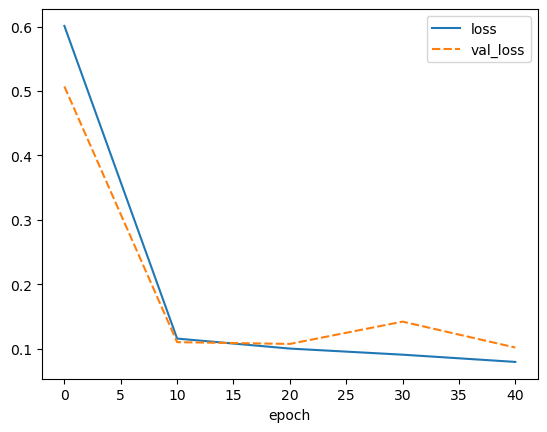

best weights loaded


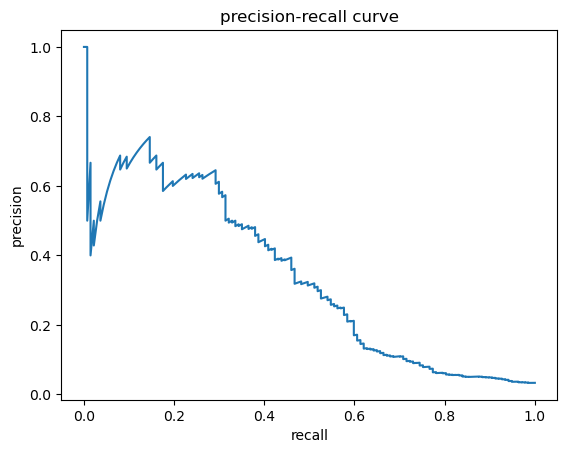

elapsed time: 328.21874237060547
run: 19
{'hidden_feats': [128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0306CD60>, <torch.utils.data.dataset.Subset object at 0x000001EE350F8190>, <torch.utils.data.dataset.Subset object at 0x000001EE350F88E0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredic

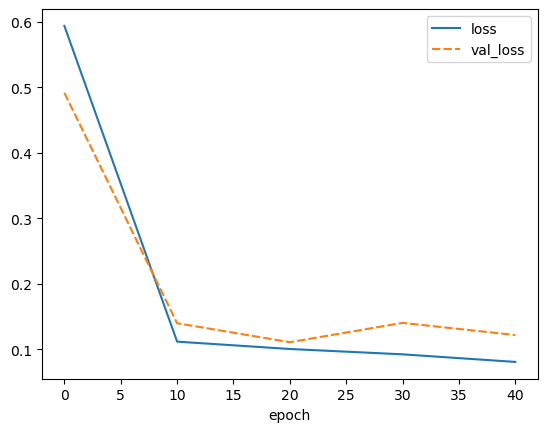

best weights loaded


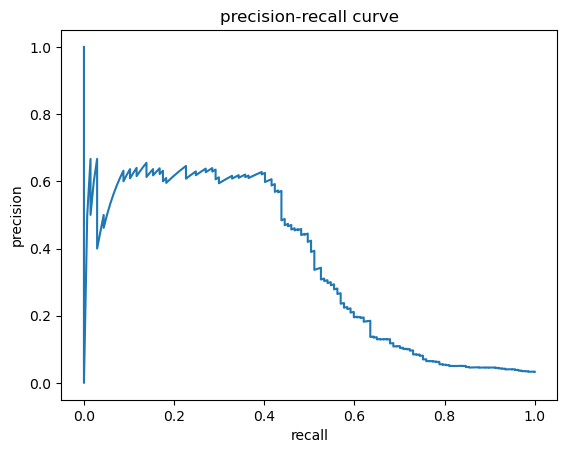

elapsed time: 296.5894606113434
run: 20
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1633D0D0>, <torch.utils.data.dataset.Subset object at 0x000001EE350E55B0>, <torch.utils.data.dataset.Subset object at 0x000001EE350E5AF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128,

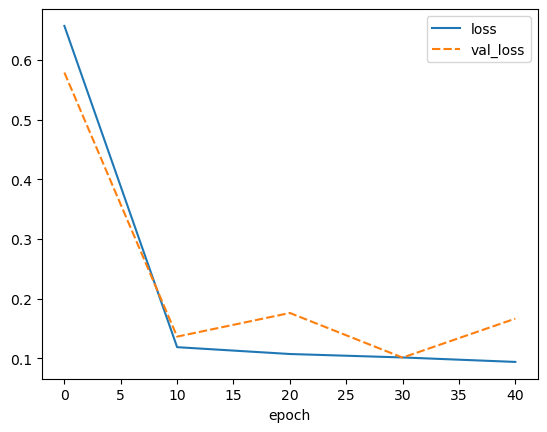

best weights loaded


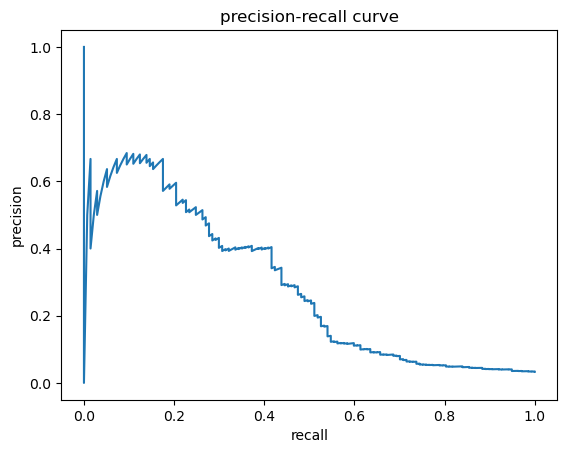

elapsed time: 278.5153956413269
run: 21
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED7D3BB1F0>, <torch.utils.data.dataset.Subset object at 0x000001EE3646A670>, <torch.utils.data.dataset.Subset object at 0x000001EE3646AB80>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128,

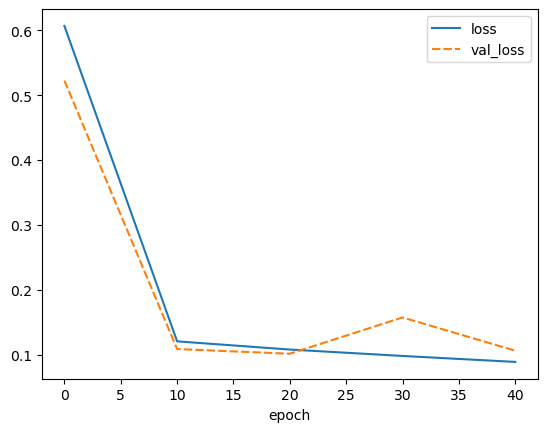

best weights loaded


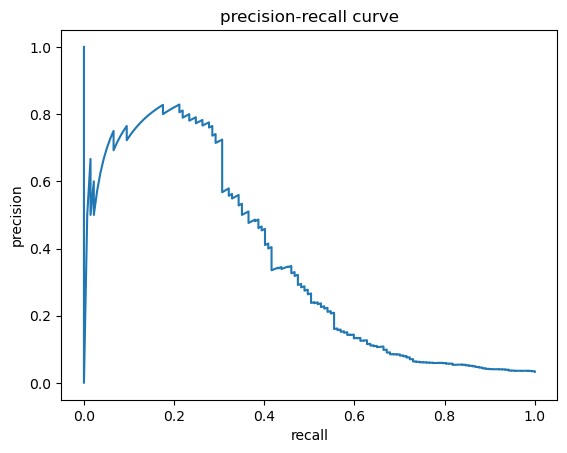

elapsed time: 268.24581718444824
run: 22
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED166BFB80>, <torch.utils.data.dataset.Subset object at 0x000001EE40D55DF0>, <torch.utils.data.dataset.Subset object at 0x000001EE40D5B2B0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128

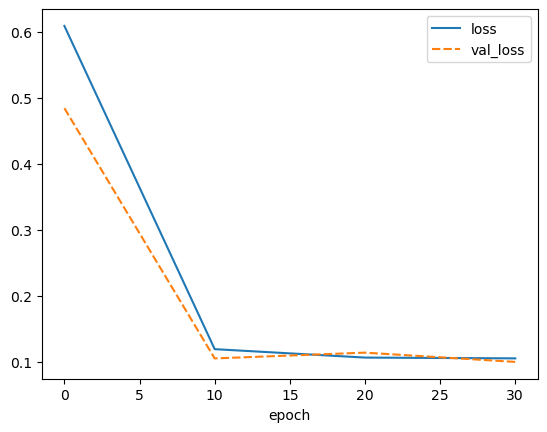

best weights loaded


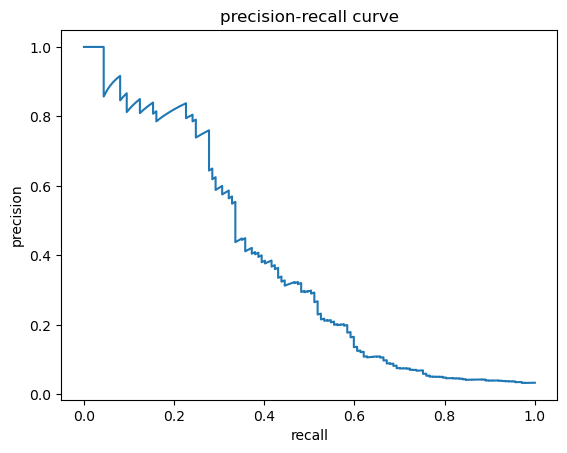

elapsed time: 282.36873292922974
run: 23
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1CFEC0D0>, <torch.utils.data.dataset.Subset object at 0x000001ED1405F3D0>, <torch.utils.data.dataset.Subset object at 0x000001ED1405F850>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=12

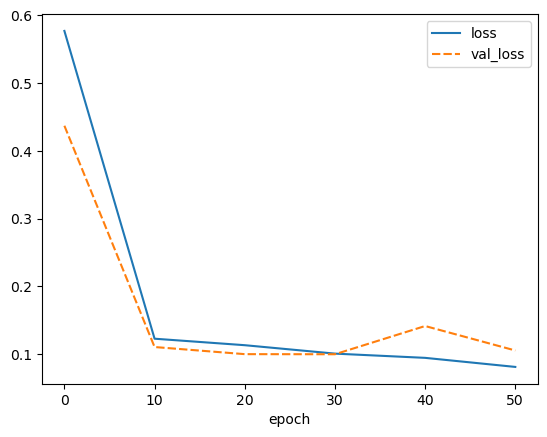

best weights loaded


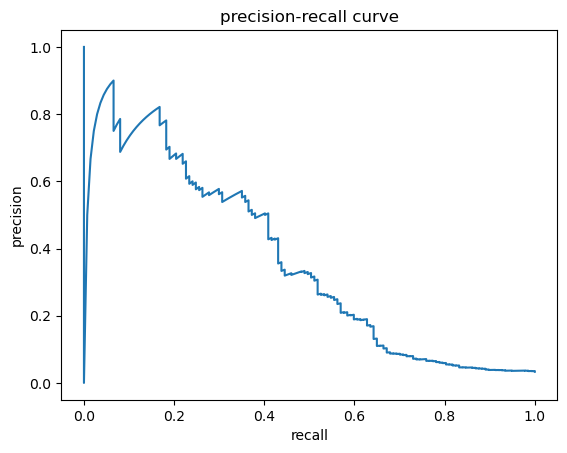

elapsed time: 355.0265283584595
run: 24
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED199F8BE0>, <torch.utils.data.dataset.Subset object at 0x000001EE40D6A040>, <torch.utils.data.dataset.Subset object at 0x000001EE40D6A4F0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

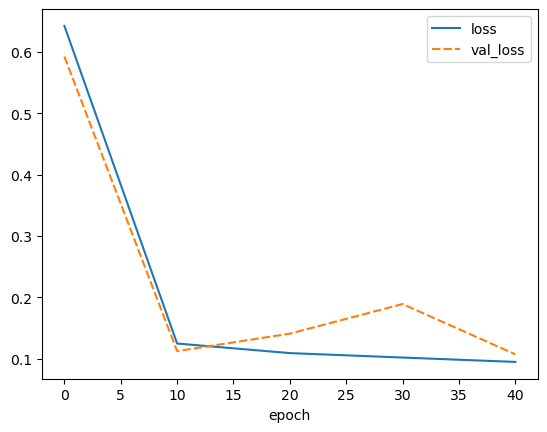

best weights loaded


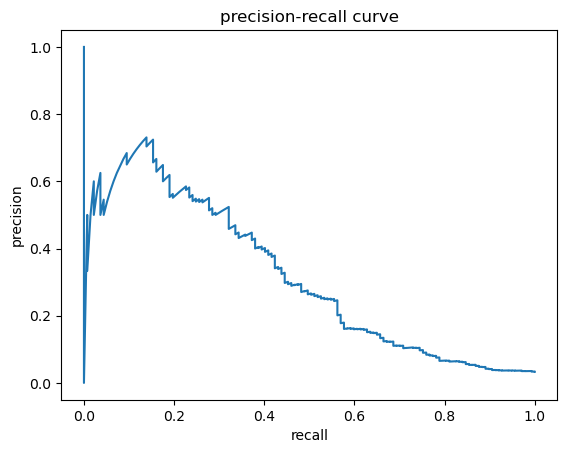

elapsed time: 366.6678349971771
run: 25
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1D0D4760>, <torch.utils.data.dataset.Subset object at 0x000001ED1405F280>, <torch.utils.data.dataset.Subset object at 0x000001ED1405F0A0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

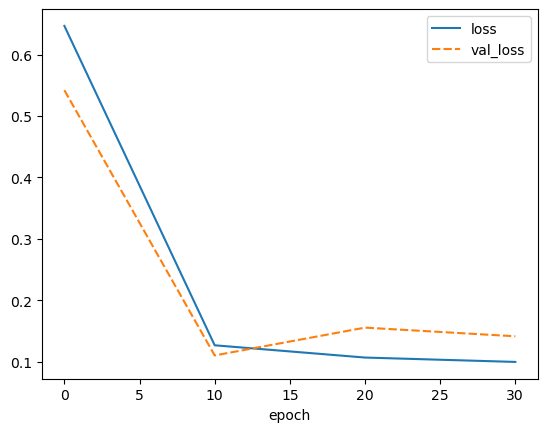

best weights loaded


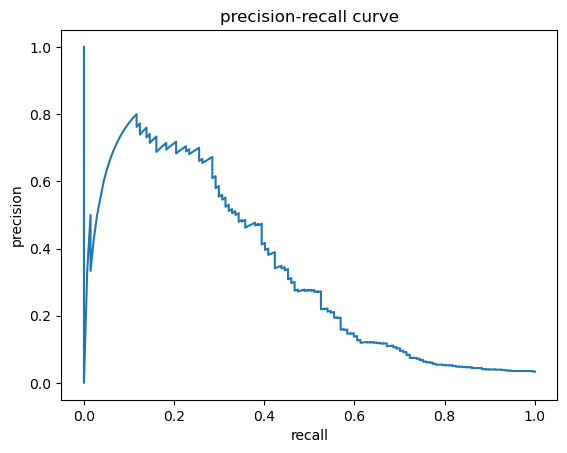

elapsed time: 327.7134437561035
run: 26
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE32CC68B0>, <torch.utils.data.dataset.Subset object at 0x000001EE40D85040>, <torch.utils.data.dataset.Subset object at 0x000001EE40D85340>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

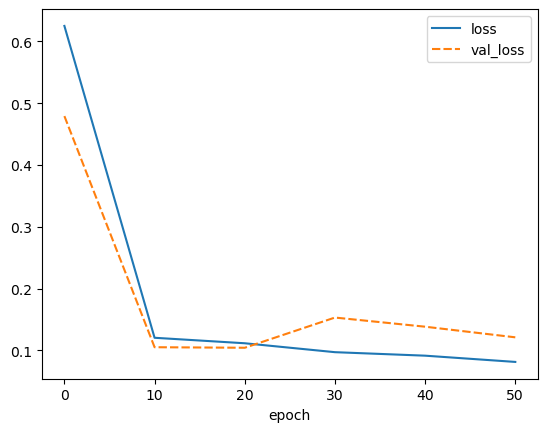

best weights loaded


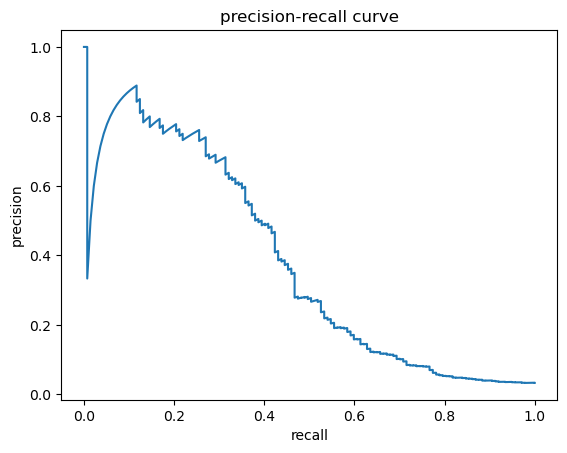

elapsed time: 378.70377588272095
run: 27
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED02AF5490>, <torch.utils.data.dataset.Subset object at 0x000001ED1EA12250>, <torch.utils.data.dataset.Subset object at 0x000001ED1EA12D30>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_

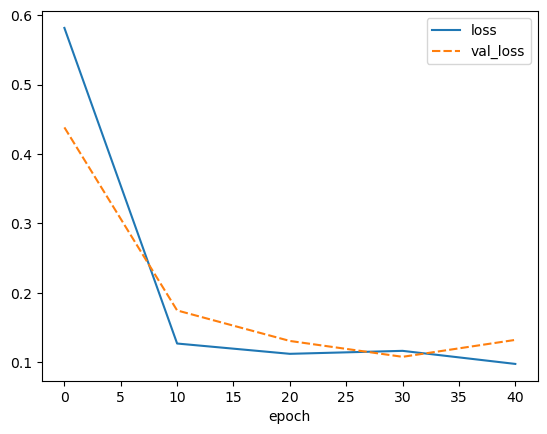

best weights loaded


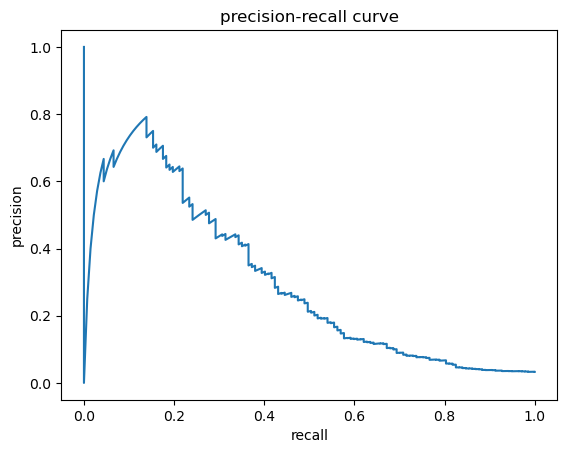

elapsed time: 270.272748708725
run: 28
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED08488B20>, <torch.utils.data.dataset.Subset object at 0x000001EE40DA5430>, <torch.utils.data.dataset.Subset object at 0x000001EE40DA5940>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(i

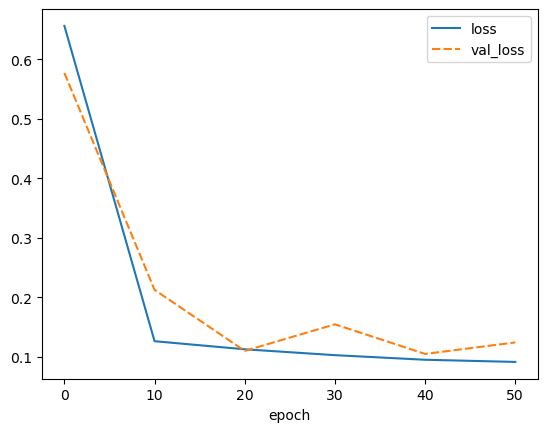

best weights loaded


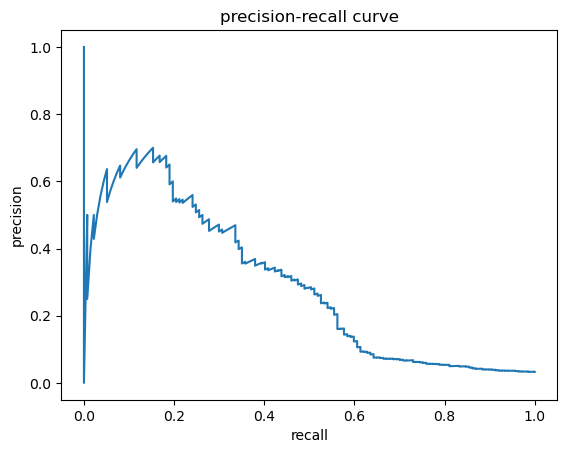

elapsed time: 311.53809809684753
run: 29
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED02DF2790>, <torch.utils.data.dataset.Subset object at 0x000001EE40DB0250>, <torch.utils.data.dataset.Subset object at 0x000001EE40DB0310>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

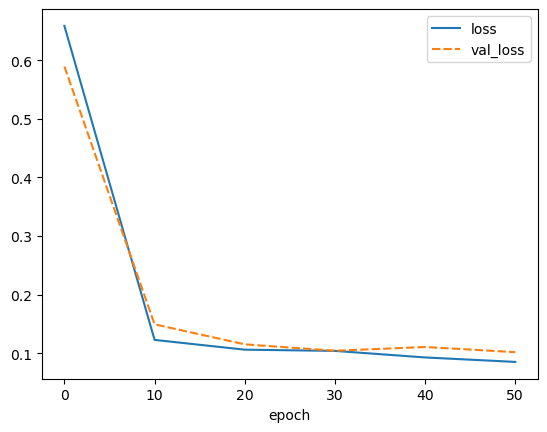

best weights loaded


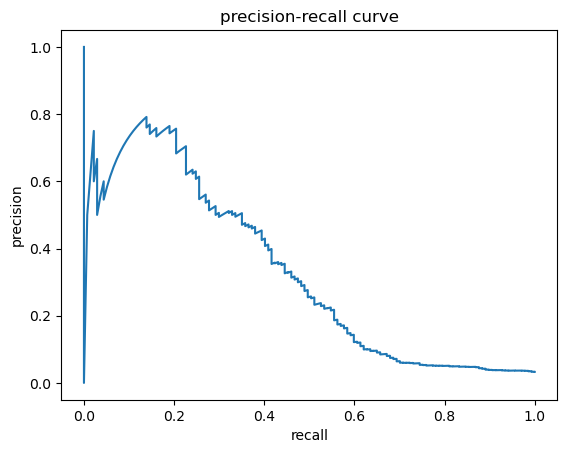

elapsed time: 340.0329854488373
run: 30
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED02607B20>, <torch.utils.data.dataset.Subset object at 0x000001EE40DB5520>, <torch.utils.data.dataset.Subset object at 0x000001EE40DB5DF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(

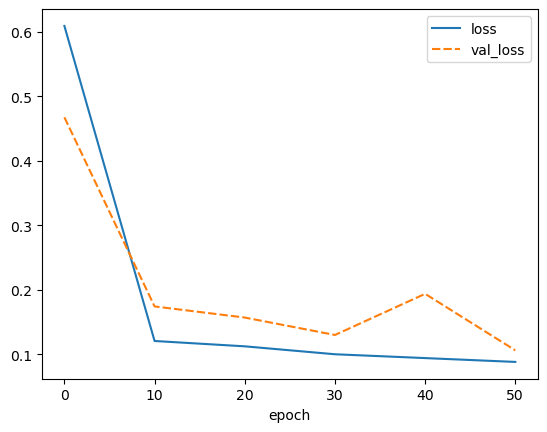

best weights loaded


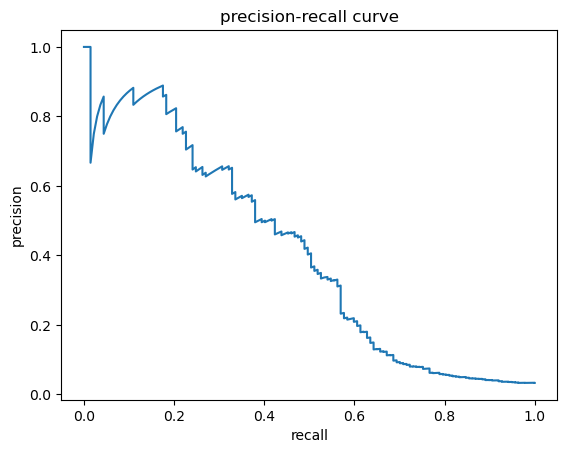

elapsed time: 362.4551782608032
run: 31
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED17F83130>, <torch.utils.data.dataset.Subset object at 0x000001EE3EBA2A30>, <torch.utils.data.dataset.Subset object at 0x000001EE3EBA2F40>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

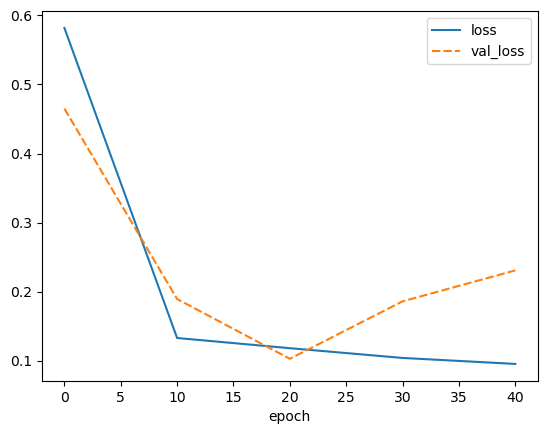

best weights loaded


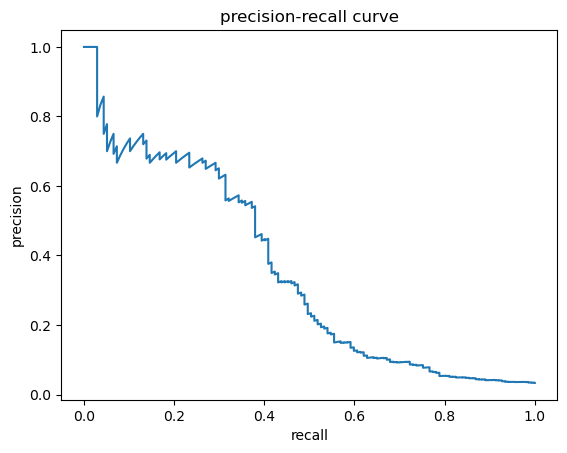

elapsed time: 365.09786105155945
run: 32
{'hidden_feats': [256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED19A05BB0>, <torch.utils.data.dataset.Subset object at 0x000001ED1B54A610>, <torch.utils.data.dataset.Subset object at 0x000001ED1B54AB20>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

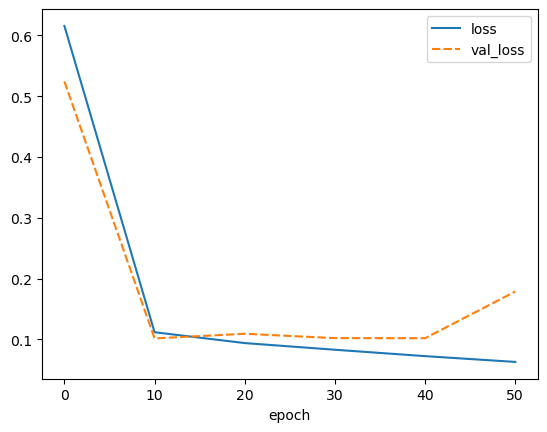

best weights loaded


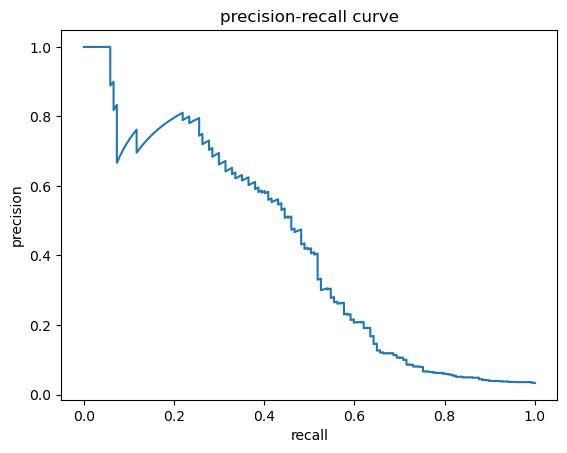

elapsed time: 333.39998292922974
run: 33
{'hidden_feats': [256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0A040370>, <torch.utils.data.dataset.Subset object at 0x000001EE471253D0>, <torch.utils.data.dataset.Subset object at 0x000001EE471258E0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

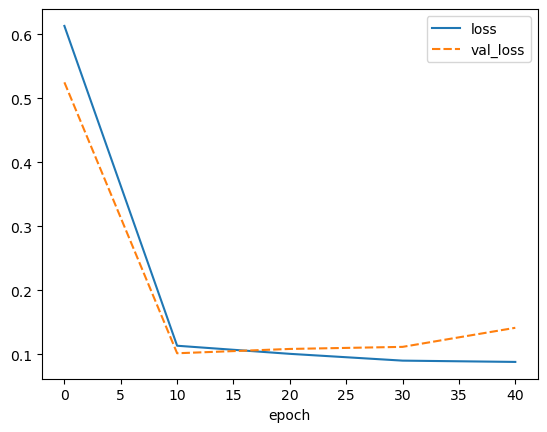

best weights loaded


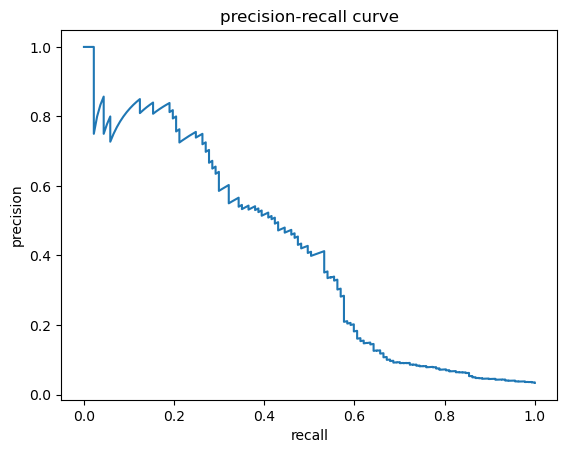

elapsed time: 310.5414810180664
run: 34
{'hidden_feats': [256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED196436A0>, <torch.utils.data.dataset.Subset object at 0x000001EE3B7901F0>, <torch.utils.data.dataset.Subset object at 0x000001EE3B790730>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredicto

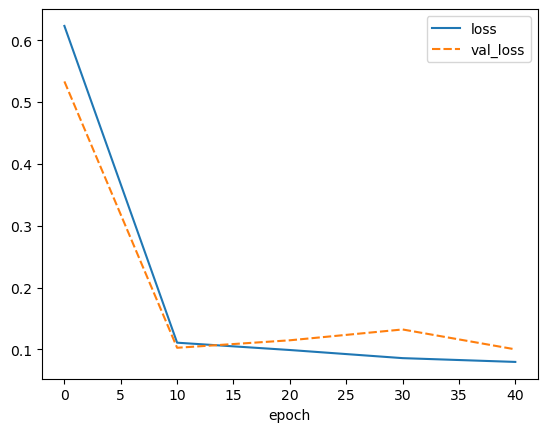

best weights loaded


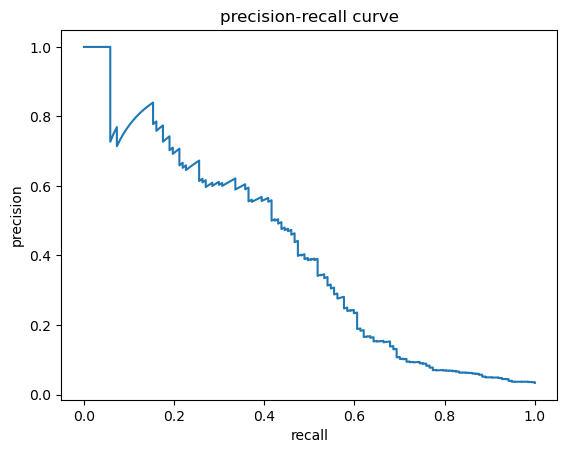

elapsed time: 266.7210488319397
run: 35
{'hidden_feats': [256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED09C26850>, <torch.utils.data.dataset.Subset object at 0x000001ED0A040610>, <torch.utils.data.dataset.Subset object at 0x000001ED0A040880>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

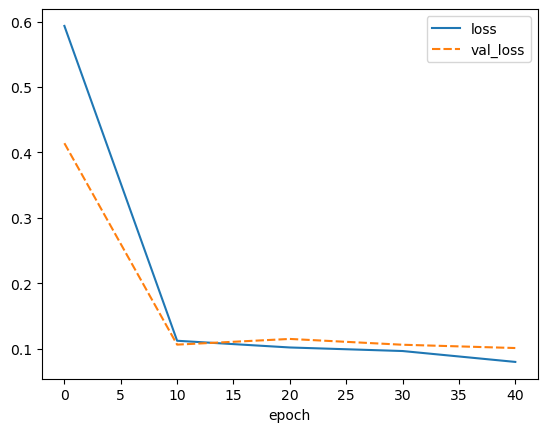

best weights loaded


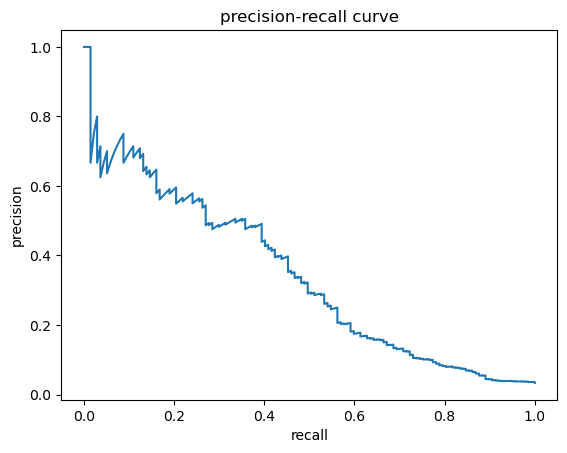

elapsed time: 252.89662170410156
run: 36
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1CA16C70>, <torch.utils.data.dataset.Subset object at 0x000001EE59DC4A30>, <torch.utils.data.dataset.Subset object at 0x000001EE59DC4F40>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256

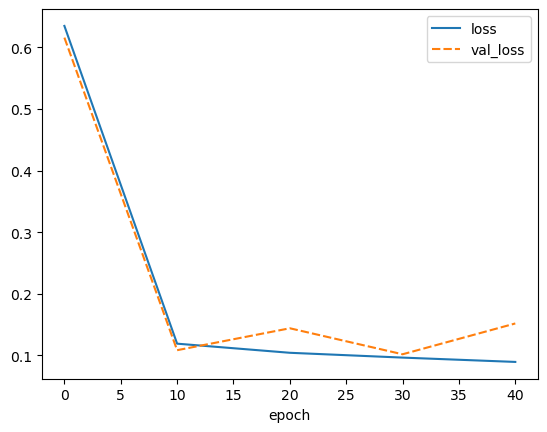

best weights loaded


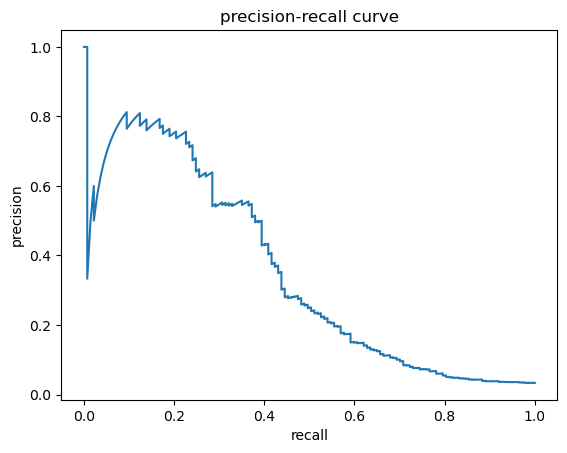

elapsed time: 367.18831276893616
run: 37
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED07E50C70>, <torch.utils.data.dataset.Subset object at 0x000001EE3EBBF9D0>, <torch.utils.data.dataset.Subset object at 0x000001EE3EBBFD90>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256

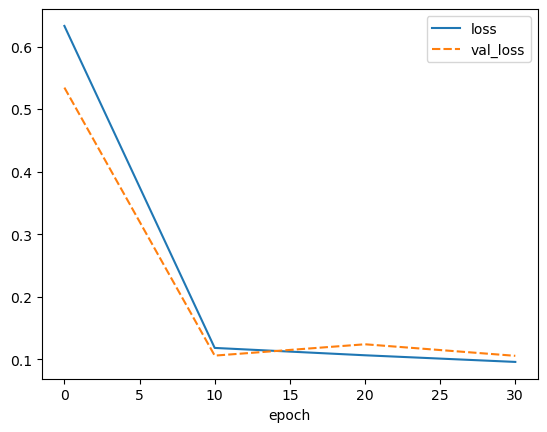

best weights loaded


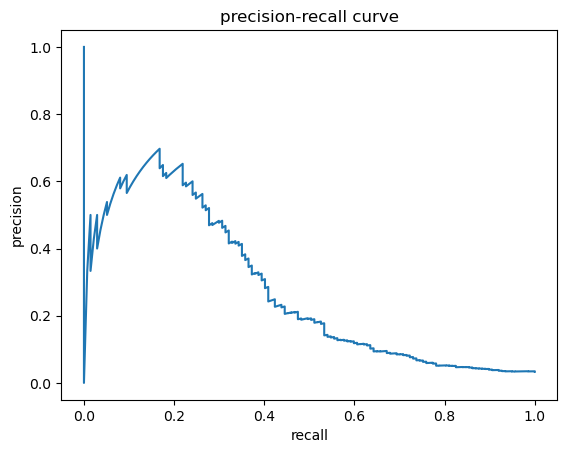

elapsed time: 293.3869869709015
run: 38
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED104E8AC0>, <torch.utils.data.dataset.Subset object at 0x000001EE40DF6BE0>, <torch.utils.data.dataset.Subset object at 0x000001EE40DF6610>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256,

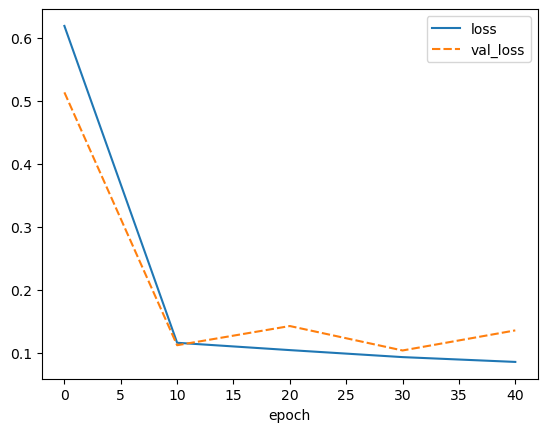

best weights loaded


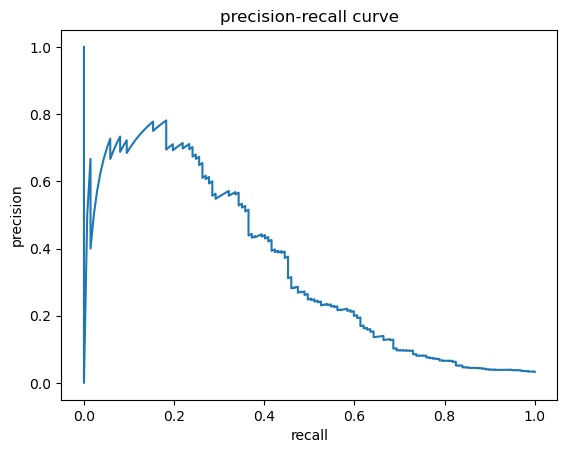

elapsed time: 350.4443817138672
run: 39
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED010EADC0>, <torch.utils.data.dataset.Subset object at 0x000001EE32CF6550>, <torch.utils.data.dataset.Subset object at 0x000001EE32CF6AF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256

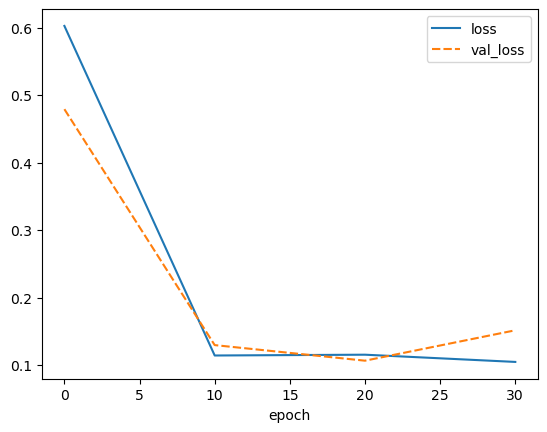

best weights loaded


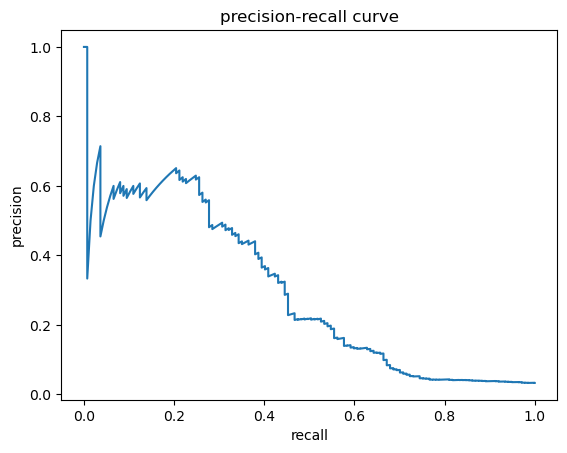

elapsed time: 276.2655749320984
run: 40
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE4D1E44C0>, <torch.utils.data.dataset.Subset object at 0x000001EE37A282E0>, <torch.utils.data.dataset.Subset object at 0x000001EE37A28820>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

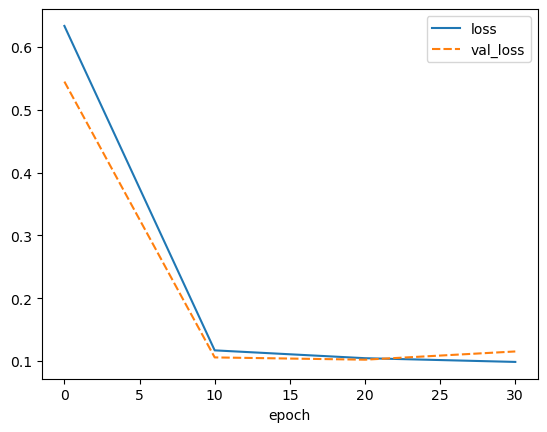

best weights loaded


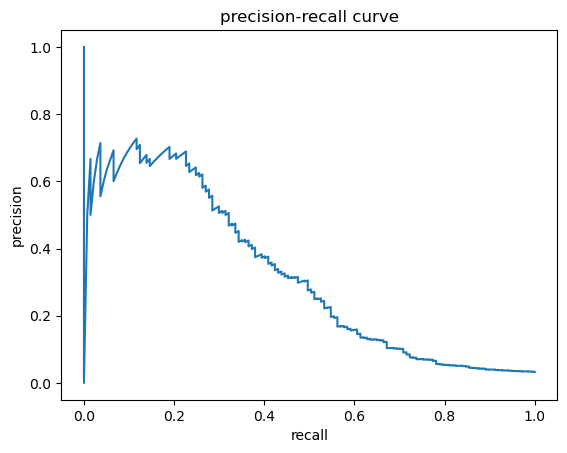

elapsed time: 308.9813024997711
run: 41
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE4882AF40>, <torch.utils.data.dataset.Subset object at 0x000001EE40E13520>, <torch.utils.data.dataset.Subset object at 0x000001EE40E13A30>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

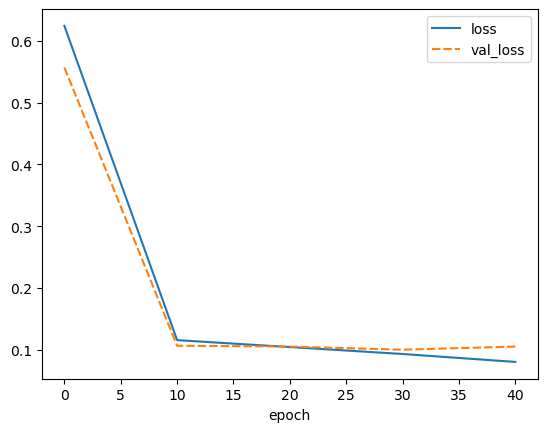

best weights loaded


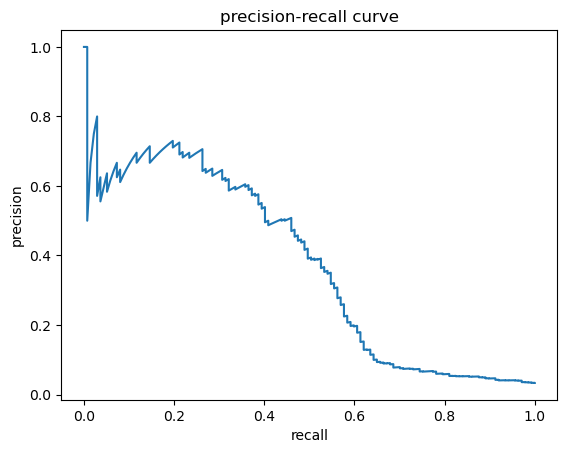

elapsed time: 396.2901132106781
run: 42
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED7EAB1CA0>, <torch.utils.data.dataset.Subset object at 0x000001ED7D721AC0>, <torch.utils.data.dataset.Subset object at 0x000001ED7D744040>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

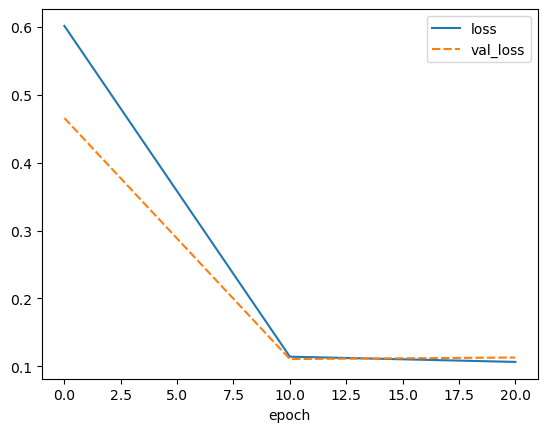

best weights loaded


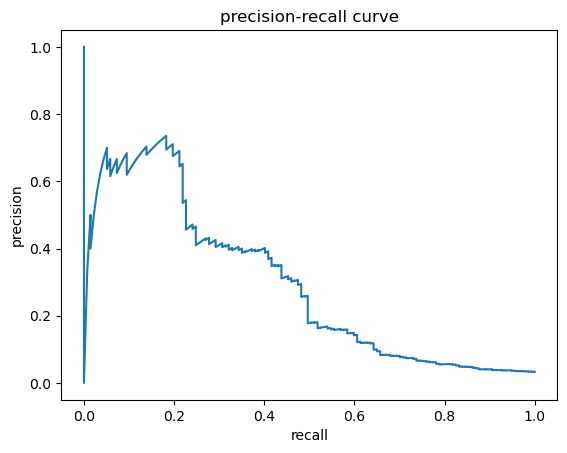

elapsed time: 286.54075288772583
run: 43
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1CE623D0>, <torch.utils.data.dataset.Subset object at 0x000001EE3BA2A430>, <torch.utils.data.dataset.Subset object at 0x000001EE3BA2A940>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_

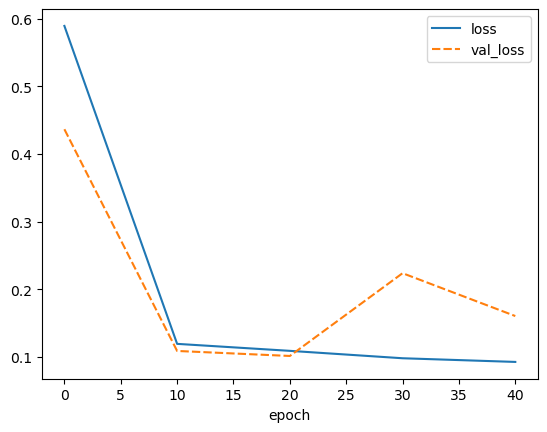

best weights loaded


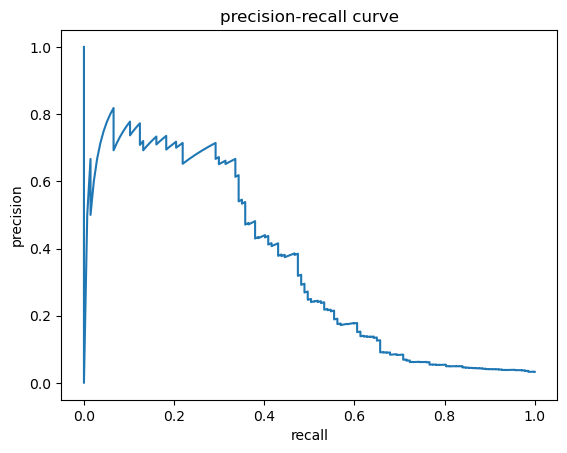

elapsed time: 344.9989986419678
run: 44
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE4B77C100>, <torch.utils.data.dataset.Subset object at 0x000001EE40E27790>, <torch.utils.data.dataset.Subset object at 0x000001EE40E27CA0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(

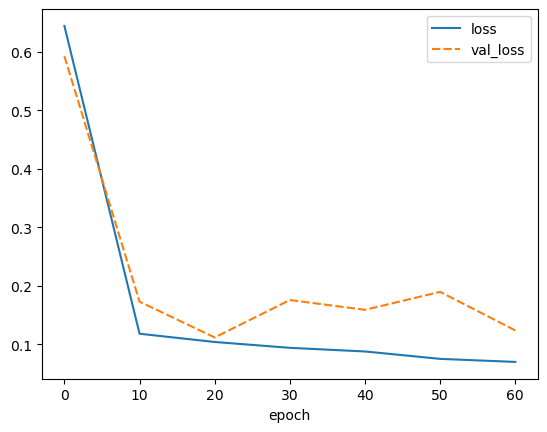

best weights loaded


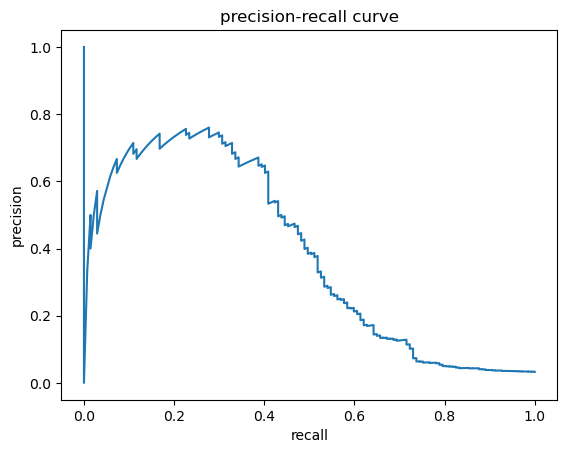

elapsed time: 393.0375304222107
run: 45
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED11E51FD0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E2D220>, <torch.utils.data.dataset.Subset object at 0x000001EE40E2D6A0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(

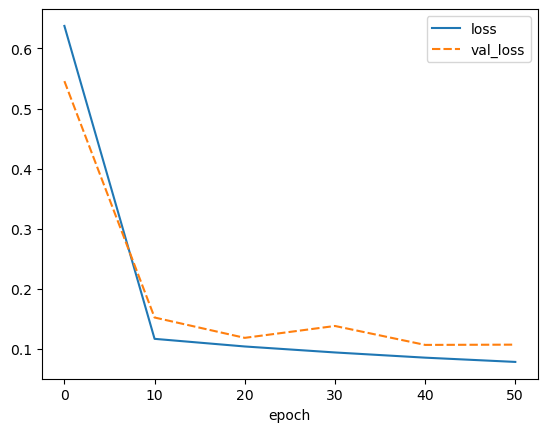

best weights loaded


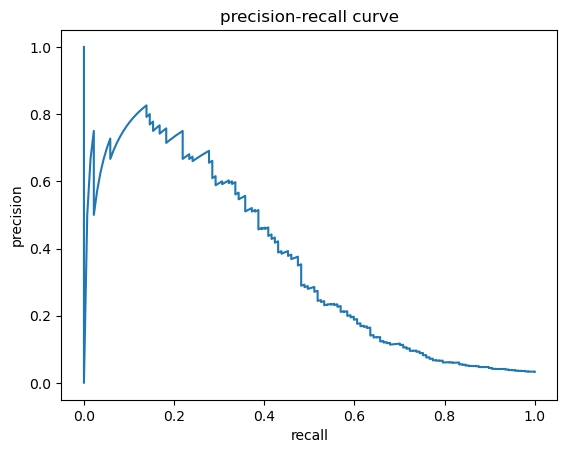

elapsed time: 332.36352825164795
run: 46
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0A1481C0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E36280>, <torch.utils.data.dataset.Subset object at 0x000001EE40E36910>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

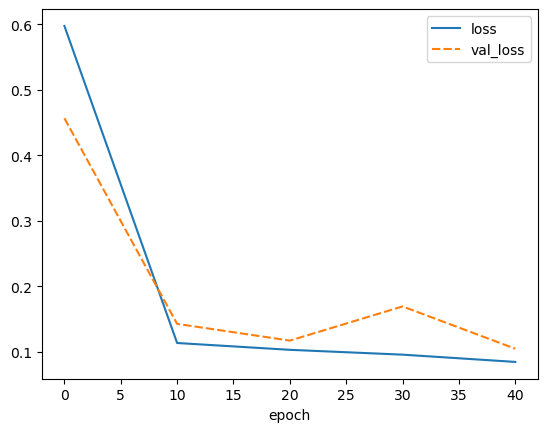

best weights loaded


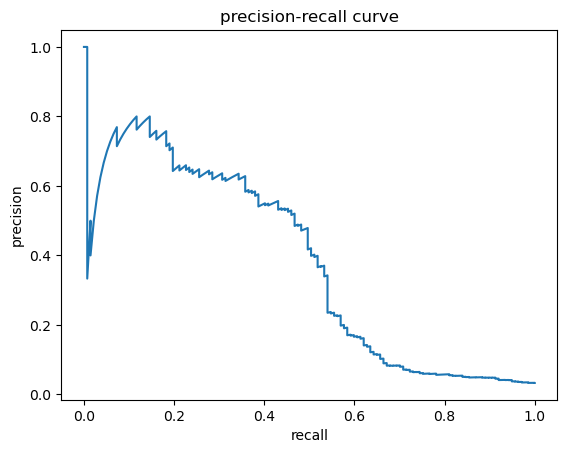

elapsed time: 312.4441223144531
run: 47
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0D1F99A0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E59CD0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E59310>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

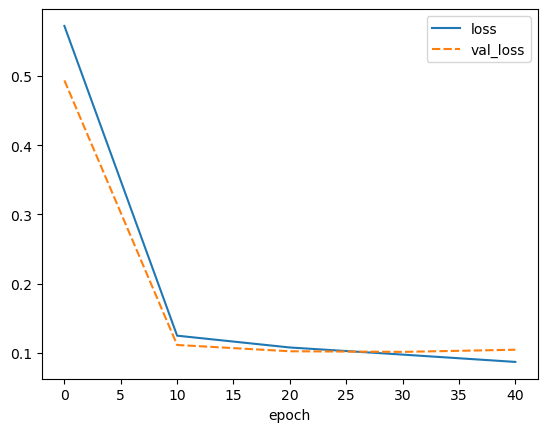

best weights loaded


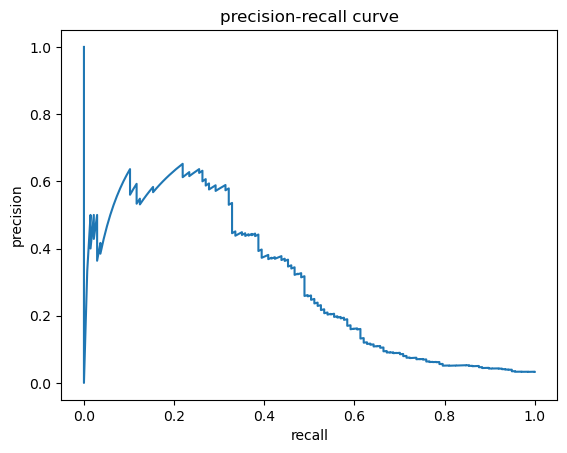

elapsed time: 283.33331823349
run: 48
{'hidden_feats': [512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED10C402B0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E52970>, <torch.utils.data.dataset.Subset object at 0x000001EE4EDA22E0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(

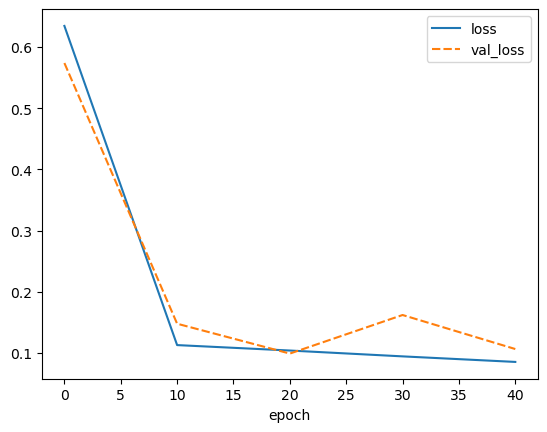

best weights loaded


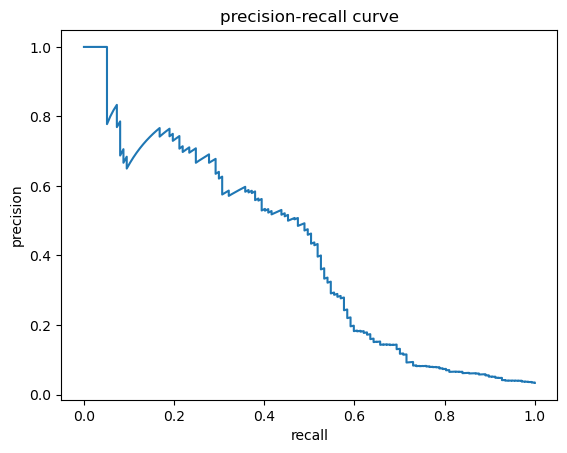

elapsed time: 317.1776633262634
run: 49
{'hidden_feats': [512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED067341F0>, <torch.utils.data.dataset.Subset object at 0x000001ED060B6EE0>, <torch.utils.data.dataset.Subset object at 0x000001ED060CE0D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredicto

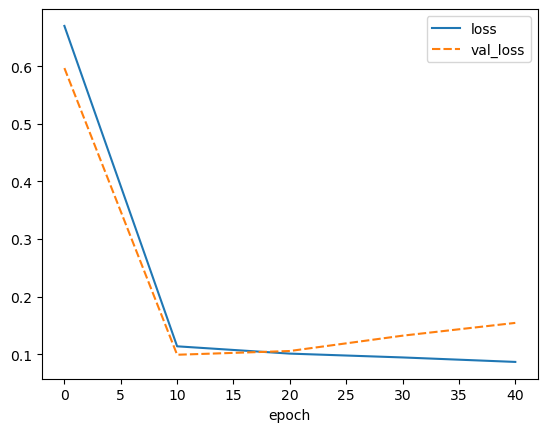

best weights loaded


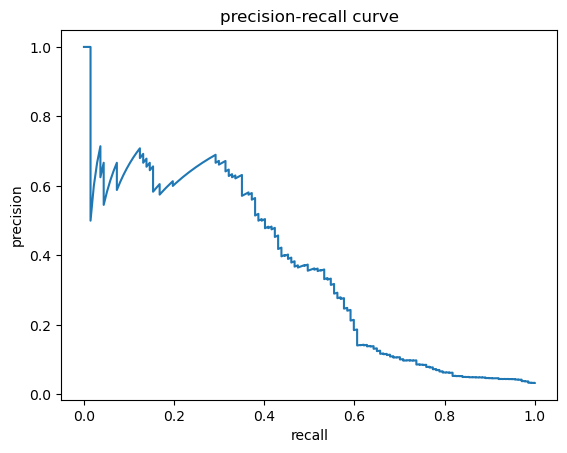

elapsed time: 297.4274847507477
run: 50
{'hidden_feats': [512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE4D0616A0>, <torch.utils.data.dataset.Subset object at 0x000001ED7EADDA30>, <torch.utils.data.dataset.Subset object at 0x000001ED7EAAF100>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredicto

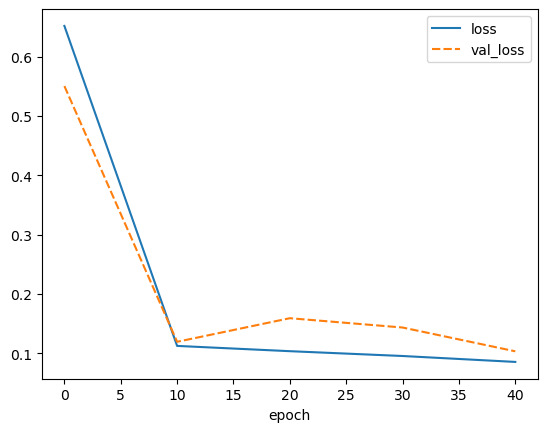

best weights loaded


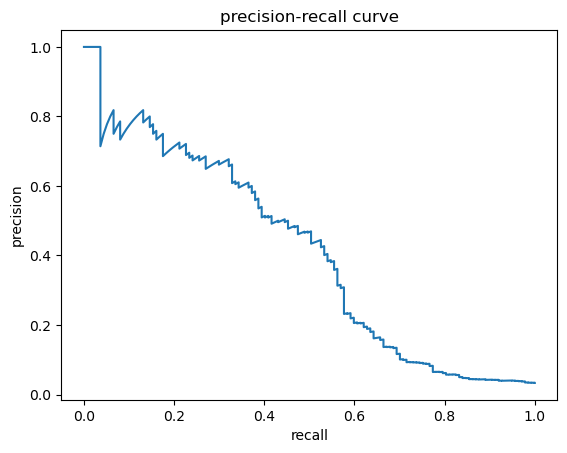

elapsed time: 309.19537329673767
run: 51
{'hidden_feats': [512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED012607F0>, <torch.utils.data.dataset.Subset object at 0x000001EE531C91C0>, <torch.utils.data.dataset.Subset object at 0x000001EE531C96D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredic

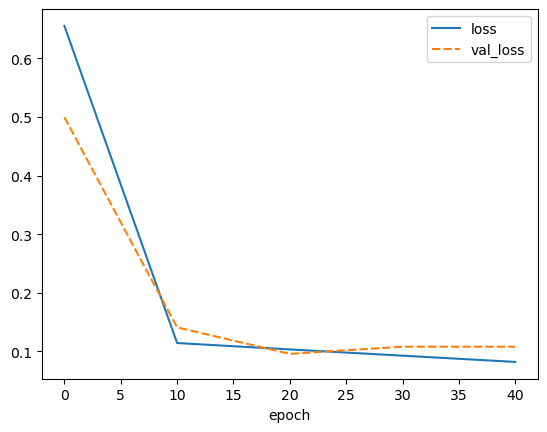

best weights loaded


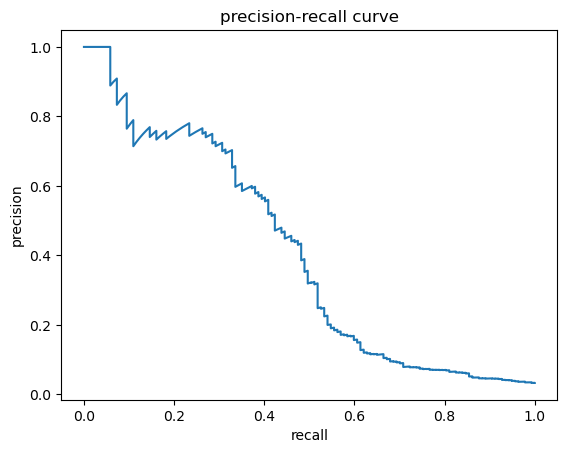

elapsed time: 295.5410234928131
run: 52
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED7FF2CAF0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E64310>, <torch.utils.data.dataset.Subset object at 0x000001EE40E64610>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512,

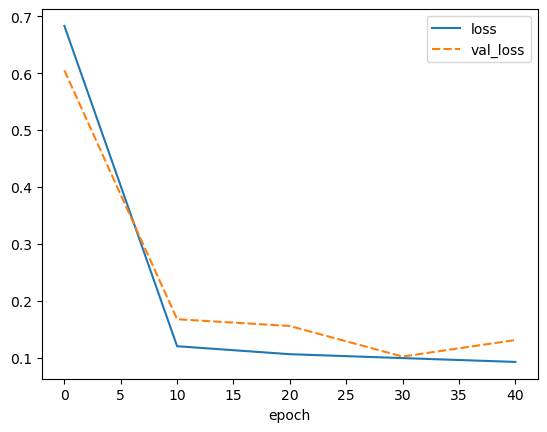

best weights loaded


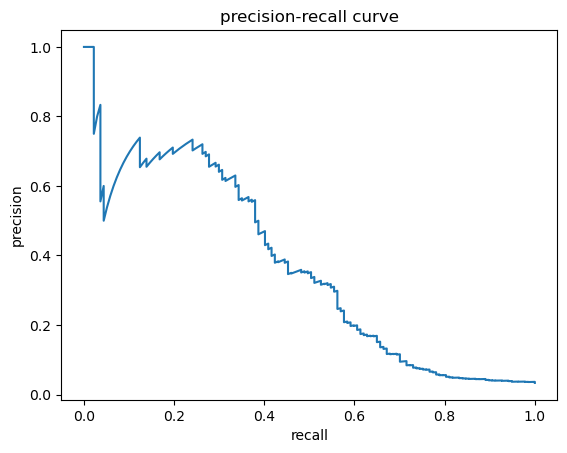

elapsed time: 292.1440873146057
run: 53
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1B2531F0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E63700>, <torch.utils.data.dataset.Subset object at 0x000001EE40E635E0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512,

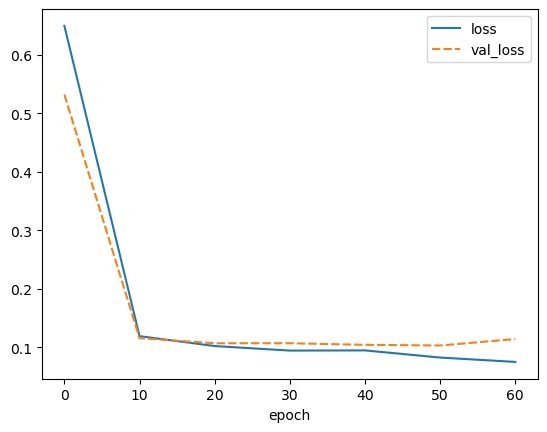

best weights loaded


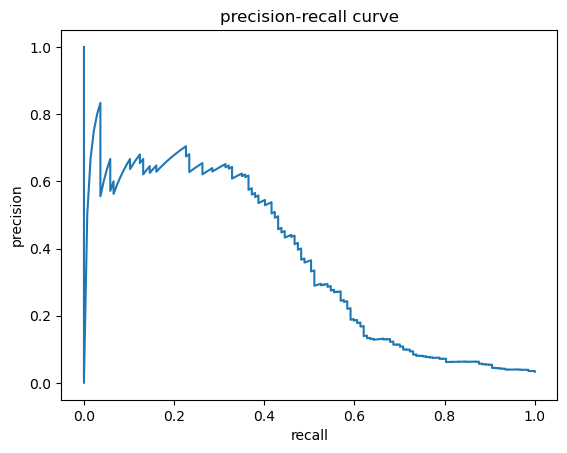

elapsed time: 388.30978441238403
run: 54
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED04BB7940>, <torch.utils.data.dataset.Subset object at 0x000001EE40E85A30>, <torch.utils.data.dataset.Subset object at 0x000001EE40E85220>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512

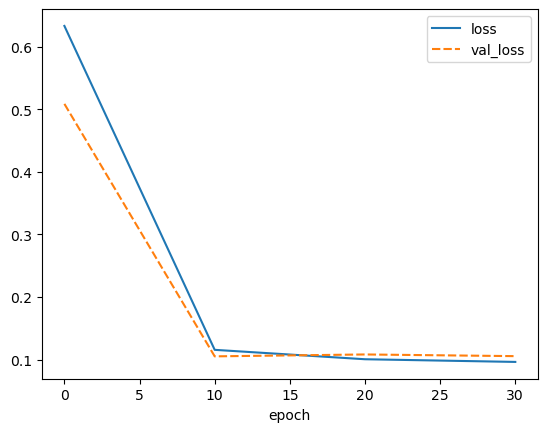

best weights loaded


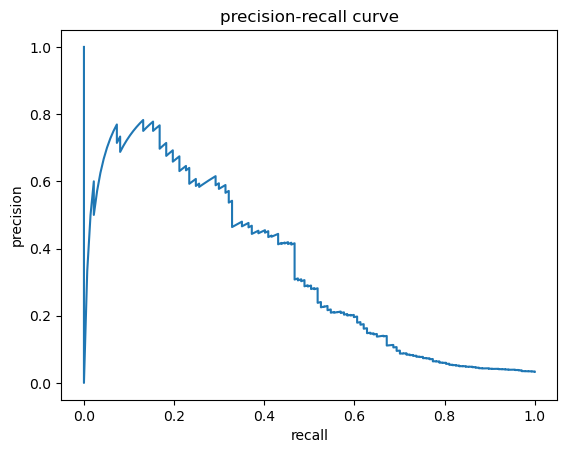

elapsed time: 254.23869395256042
run: 55
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE32E82C70>, <torch.utils.data.dataset.Subset object at 0x000001ED1EC097F0>, <torch.utils.data.dataset.Subset object at 0x000001ED7EDE5820>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=51

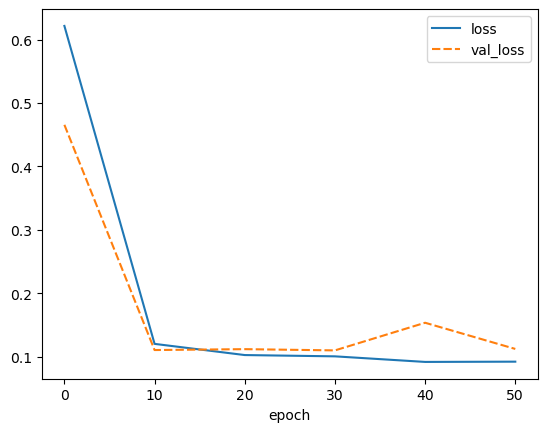

best weights loaded


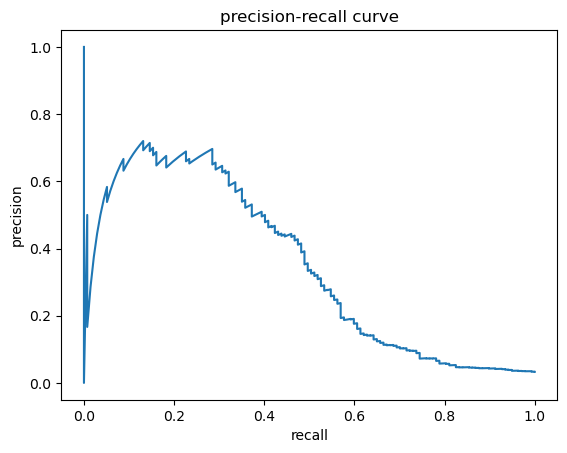

elapsed time: 348.6955690383911
run: 56
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001EE46EE2940>, <torch.utils.data.dataset.Subset object at 0x000001EE529DABB0>, <torch.utils.data.dataset.Subset object at 0x000001EE529DA310>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

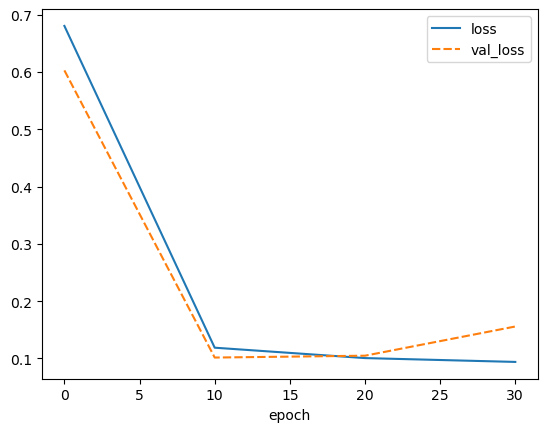

best weights loaded


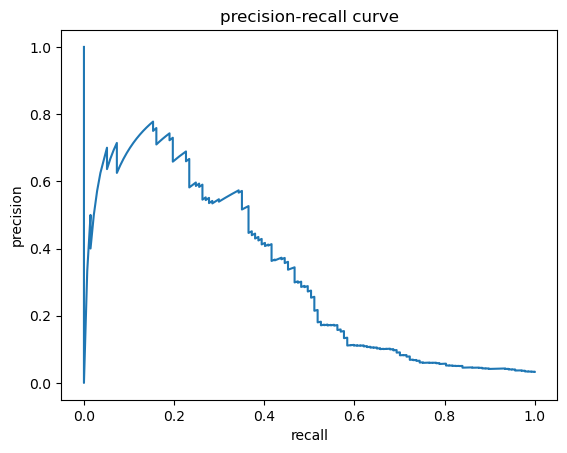

elapsed time: 306.6629056930542
run: 57
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED04A753D0>, <torch.utils.data.dataset.Subset object at 0x000001EE40E91910>, <torch.utils.data.dataset.Subset object at 0x000001EE40E91FA0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

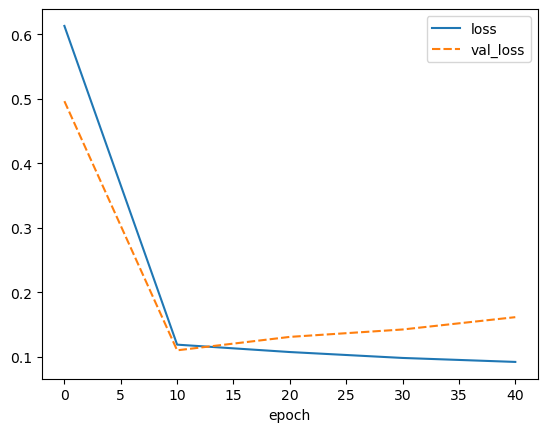

best weights loaded


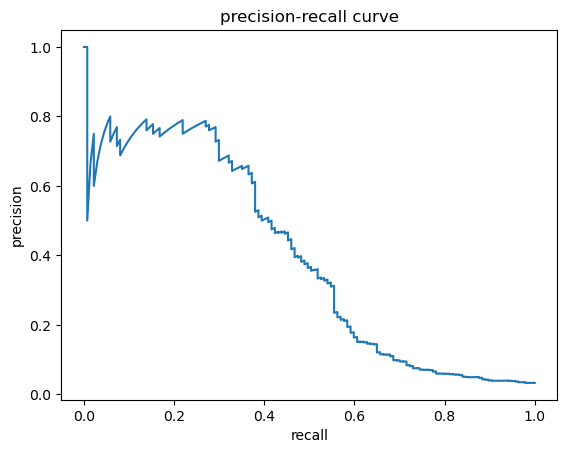

elapsed time: 321.15734004974365
run: 58
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED1E3935E0>, <torch.utils.data.dataset.Subset object at 0x000001ED2C3A8490>, <torch.utils.data.dataset.Subset object at 0x000001ED2C3A8B20>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

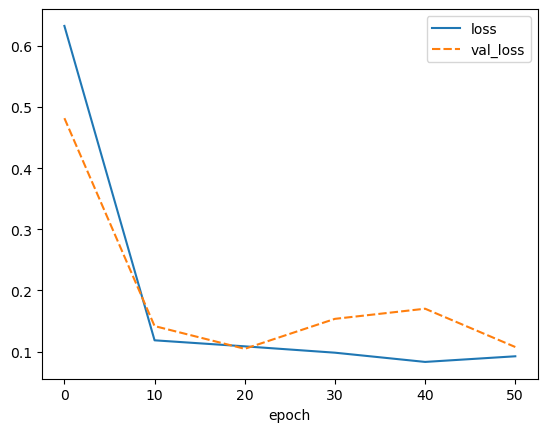

best weights loaded


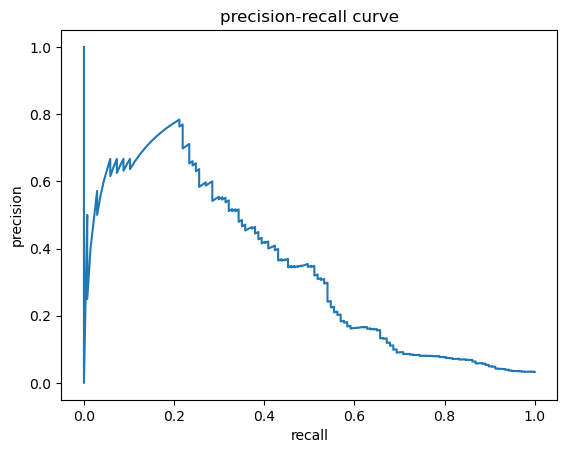

elapsed time: 367.97152853012085
run: 59
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED05EFCE50>, <torch.utils.data.dataset.Subset object at 0x000001EE0EB13E20>, <torch.utils.data.dataset.Subset object at 0x000001EE0EB137F0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_

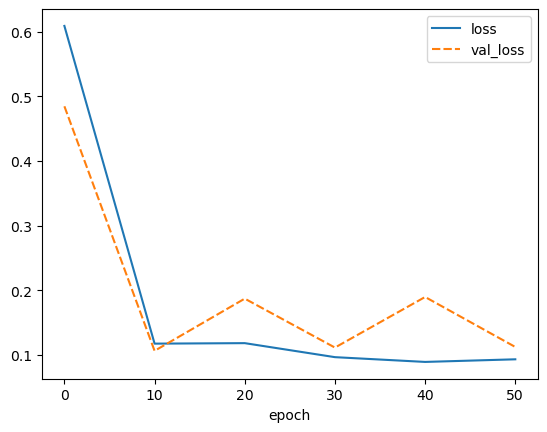

best weights loaded


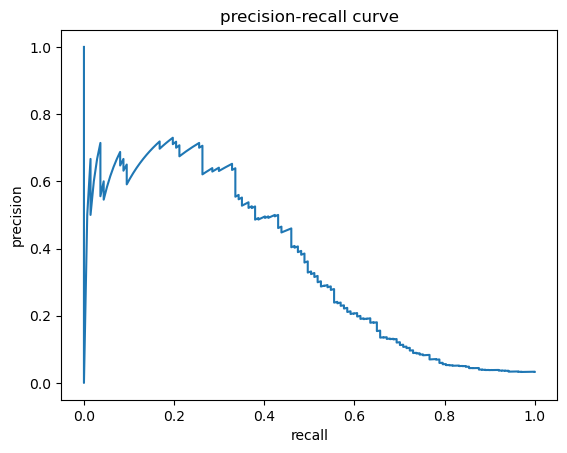

elapsed time: 376.67662024497986
run: 60
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0EEB0700>, <torch.utils.data.dataset.Subset object at 0x000001EE4F160100>, <torch.utils.data.dataset.Subset object at 0x000001EE4F160880>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

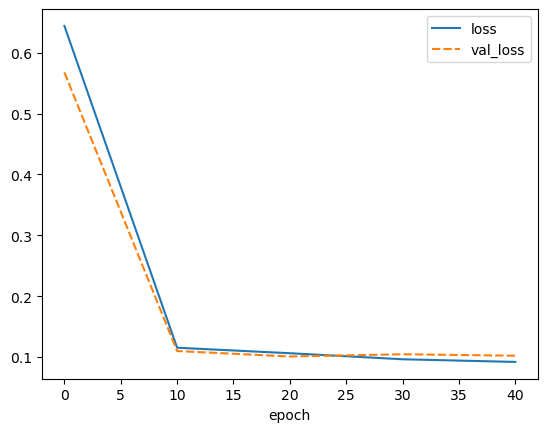

best weights loaded


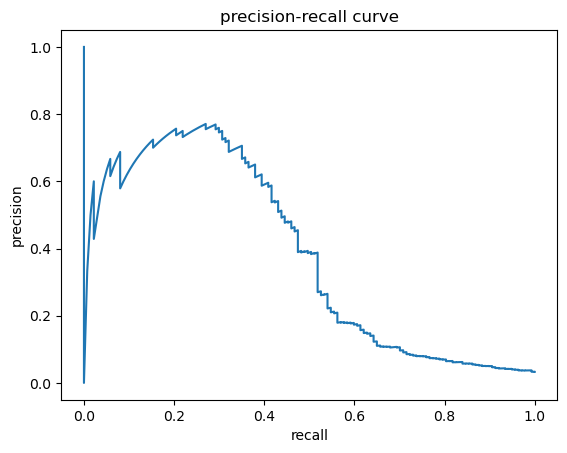

elapsed time: 415.48832845687866
run: 61
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED19B3C730>, <torch.utils.data.dataset.Subset object at 0x000001EE40EC77F0>, <torch.utils.data.dataset.Subset object at 0x000001EE40EC7D30>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

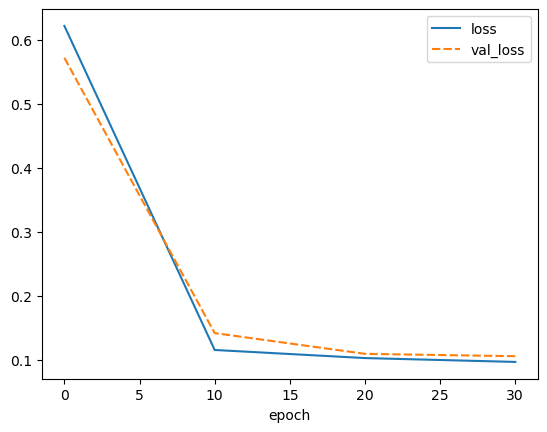

best weights loaded


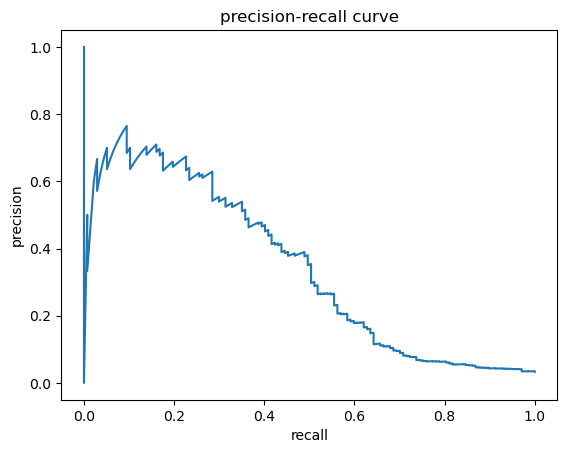

elapsed time: 347.64057898521423
run: 62
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED0B57C9A0>, <torch.utils.data.dataset.Subset object at 0x000001EE54487C40>, <torch.utils.data.dataset.Subset object at 0x000001EE54487400>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

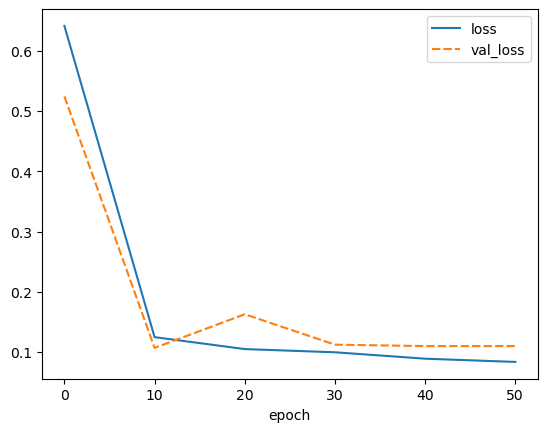

best weights loaded


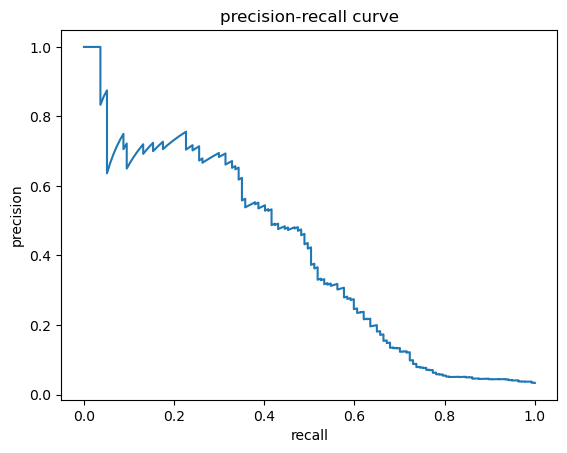

elapsed time: 426.3512051105499
run: 63
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000001ED07B01250>, <torch.utils.data.dataset.Subset object at 0x000001ED3288C190>, <torch.utils.data.dataset.Subset object at 0x000001ED3288C250>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x000001ED72773DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

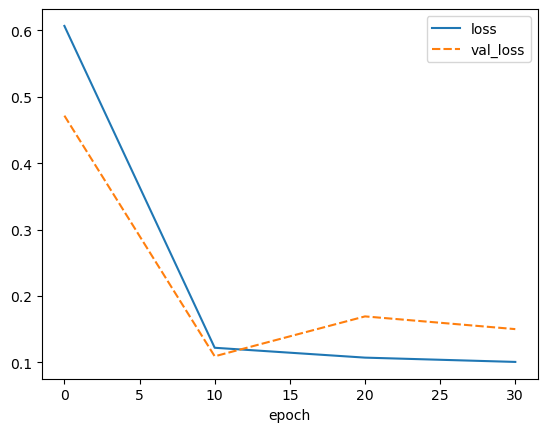

best weights loaded


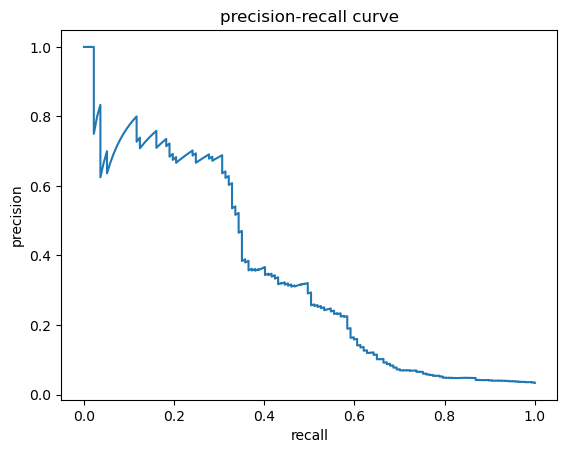

elapsed time: 336.8012011051178


In [14]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    '''
    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 
    '''
    hidden_feats = combination_dict["hidden_feats"]
    predictor_hidden_feats = combination_dict["predictor_hidden_feats"]

    if create_new_data:
        data, data_y = load_hiv()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage=0.1, apply_scaffold_split = apply_scaffold_split )
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_class_hiv.pkl'
        else: 
            loader_file = 'datasets_class_hiv.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders

        train_dataset, test_dataset, val_dataset = create_dgl_sets(datasets=[train_dataset, test_dataset, val_dataset])

        '''
        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
        '''
            
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    #if not use_fingerprints:
    #model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)
    model, device, optimizer, loss_fn = initialize_dgl_classification_model(in_feats=train_dataset[0][0].ndata["h"].shape[-1], hidden_feats=hidden_feats, gnn_norm=None, activation=None, residual=None, batchnorm=None, dropout=None, classifier_dropout=0.0, n_tasks=1, predictor_hidden_feats=predictor_hidden_feats, predictor_dropout=0.0)

    #model, best_model_weights, losses, val_losses = regression_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    model, best_model_weights, losses, val_losses = classification_dgl_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
    
    plt.show()
    #mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)
    precisions, recalls, thresholds, dfs = predict_dgl_classification(model, test_loader, device, best_model_weights, plot_final = True)

    '''
    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, test_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)
    '''


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #classification
    save_dict["precisions"] = precisions
    save_dict["recalls"] = recalls
    save_dict["thresholds"] = thresholds
    from sklearn.metrics import precision_recall_curve, auc
    save_dict["auc"] = auc(recalls, precisions)

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    '''
    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
    '''

    save_dict["hidden_feats"] = hidden_feats
    save_dict["predictor_hidden_feats"] = predictor_hidden_feats

    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    